# Preprocessing - Test Notebook

Notebook for testing individual steps of our data preprocessing approach on a small subset of the original dataset. This will allow us to check if our code works as expected, and to identify any potential errors or areas for improvement. 

## Steps in Data Preprocessing
1. Sorting 
2. Checking for Negative Values
3. Replacing Missing Values
4. Identifying and Replacing Outliers

## Standard Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
from seaborn import distplot

## Functions Used

### Function 1 - Plotting Description Dataframes

I wrote a function that will plot specified metrics of a description dataframe in a single figure of subplots. This will help us compare the effect of different stages of preprocessing on important statistical measures such as mean, standard deviation, minimum and maximum values, and non-null value counts.

In [5]:
def plot_description_dataframe(original_data, processed_data=None, figsize=(20, 15), 
                               cols=['count', 'mean', 'std', 'min', 'max'], 
                               subplot_rows=3, subplot_cols=2, 
                               start_date_idx=2, end_date_idx=1036, 
                               is_interactive=False):
    """A function to visualize a dataframe's description metrics. Also allows 
    for comparison of the same metrics with optional post processing dataframe"""
    # Switch backend if required
    if is_interactive:
        %matplotlib notebook
    else:
        %matplotlib inline
        
    # Dates will be used for all metrics
    dates = original_data.columns[start_date_idx:end_date_idx]
    
    # Create a new figure
    f = plt.figure()
    
    # Set its width and height as specified in the arguments
    fig_width, fig_height = figsize
    f.set_figheight(fig_height)
    f.set_figwidth(fig_width)
  
    # Assign an integer to every column name in the description df to be plotted
    for (i, metric) in enumerate(cols):
        # Create subplots with specified rows and cols, i + 1 necessary because
        # subplot numbering is 1-index, whereas column name indexing is 0-indexed 
        plt.subplot(subplot_rows, subplot_cols, i + 1)
      
        # Plot the metric for the original data - only for kWh columns
        plt.plot(dates, original_data.loc[cols[i]][start_date_idx:end_date_idx], label='Original')
      
        # If also comparing processed data, plot the same metric for it as well
        if processed_data is not None:
            plt.plot(dates, processed_data.loc[cols[i]][start_date_idx:end_date_idx], label='Processed')
          
        # Annotate the plot
        plt.xlabel('Date', fontsize=14)
        plt.ylabel(cols[i], fontsize=14)
        plt.title(cols[i], fontsize=18)
      
        # Add a legend 
        plt.legend()

        # Space things out properly if needed
        plt.tight_layout()

### Function 2 - Plotting kWh Data

This function will plot the kWh data for consumers of specified index numbers on separate graphs, either from the original dataset or from both the original and processed datasets. 

This function will help us compare the effects of a preprocessing step on the actual kWh trend of an individual consumer.

In [7]:
def plot_consumer_kWhs(original_data, consumer_idx=[0], kWh_start_idx=2, kWh_end_idx=1036, 
                       processed_data=None, figsize=(18, 6),
                      plot_mean_std=False, is_interactive=False, original_first=True):
    """A function to plot the kWhs for specified consumers. Allows comparison with
    post-processed kWh data with optional argument."""
    # Dates will be used as DatetimeIndex for easy plotting
    dates = pd.DatetimeIndex(original_data.columns[kWh_start_idx : kWh_end_idx])
    
    # If interactive, use appropriate Jupyter magic command
    if is_interactive:
        %matplotlib notebook
    else:
        %matplotlib inline
    
    # For every consumer index specified
    for i in consumer_idx:
        # Create a new figure
        plt.figure(figsize=figsize)
        
        # Do not plot if not one-to-one correspondence between dates and kWhs
        assert len(dates) == len(original_data.iloc[i, kWh_start_idx : kWh_end_idx])
        
        # Plot the kWhs for the original data
        plt.plot(dates, original_data.iloc[i, kWh_start_idx : kWh_end_idx], 
                 label='Original', 
                 zorder=10 if original_first else 0)
        
        # If required, also plot the processed data
        if processed_data is not None:    
            plt.plot(dates, processed_data.iloc[i, kWh_start_idx:kWh_end_idx], label='Processed',
                zorder=0 if original_first else 10)  # processed data will be superimposed over other graphs
            
        # If plotting mean and thresholds as well
        if plot_mean_std:
            # Calculate mean, standard deviation, and threshold for the original data
            mean_org = original_data.iloc[i, kWh_start_idx : kWh_end_idx].mean()
            std_org = original_data.iloc[i, kWh_start_idx : kWh_end_idx].std()
            threshold_org = mean_org + 2 * std_org
            
            # Plot the mean and threshold for the original data on same graph
            plt.plot(dates, np.ones((len(dates), 1)) * mean_org, 'r:', label='Mean (Original)')
            plt.plot(dates, np.ones((len(dates), 1)) * threshold_org, 'r--', label='Threshold (Original)')
    
            # Calculate and plot the mean of processed data if required
            if processed_data is not None:
                # Calculate and plot the mean of the processed data
                mean_processed = processed_data.iloc[i, kWh_start_idx : kWh_end_idx].mean()
                plt.plot(dates, mean_processed * np.ones((len(dates), 1)), 'b:', label='Mean (Processed)')

        # Annotate Axes
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('kWh', fontsize=14)
        
        # Get the last 4 characters in the consumer id for the title
        consumer_ID = original_data.iloc[i, 0]
        consumer_ID = consumer_ID[-5:-1]
        title_str = "kWh Against Time - Consumer {} \n ID Ending {}".format(i, consumer_ID)
        plt.title(title_str, fontsize=18)

        # Grid and legend are necessary
        plt.grid(True)
        plt.legend()

## Loading Data

Will first need to mount Google Drive folder with the original `data.csv` file. Will then read it as a CSV using `pandas`.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
# File path for the original data
filepath = '/content/drive/My Drive/EE 16-17 FYP DL Energy Theft Detection/Data/data.csv'

In [4]:
# Read raw data
raw_data = pd.read_csv(filepath)

NameError: name 'filepath' is not defined

In [6]:
# Confirm data read successfully
raw_data.head()

CONS_NO  FLAG  ...  2016/9/8  2016/9/9
0  0387DD8A07E07FDA6271170F86AD9151     1  ...     17.84     14.92
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...      0.00      0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       NaN       NaN
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...     19.37     15.92
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...     18.41     17.31

[5 rows x 1036 columns]

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


## Sorting Data
Data is clearly not in chronological order. Sorting using the following workflow
1. Separate the kWh columns from the `FLAG` and `CONS_NO` columns.
2. Convert the columns in the `kWhs` dataframe from `str` to `datetime` objects.
3. Sort the columns in the `kWhs` dataframe in chronological order.
4. Join the sorted `kWhs` dataframe with the `CONS_NO` and `FLAG` columns.

In [0]:
# Separating the consumer number and flags - columns 0 and 1
cons_flag_df = raw_data.iloc[:, :2]

# kWhs will be sorted - columns 2 and onwards
kWhs_df = raw_data.iloc[:, 2:]

In [10]:
# Examine the kWhs dataframe
kWhs_df.head()

2014/1/1  2014/1/10  2014/1/11  ...  2016/9/7  2016/9/8  2016/9/9
0       NaN        NaN        NaN  ...     18.75     17.84     14.92
1       NaN        NaN        NaN  ...      0.00      0.00      0.00
2       NaN        NaN        NaN  ...       NaN       NaN       NaN
3       NaN        NaN        NaN  ...     12.82     19.37     15.92
4       2.9       3.42       3.81  ...     18.14     18.41     17.31

[5 rows x 1034 columns]

The columns are not in order. Should be 2014/1/1, 2014/1/2, 2014/1/3,... and so on. 

In [0]:
# Converting the columns in the dataframe to datetime objects
kWhs_df.columns = pd.to_datetime(kWhs_df.columns).date # .date ensures we don't have to deal with timestamp

### kWhs Dataframe Before Sorting

In [12]:
kWhs_df.head()

2014-01-01  2014-01-10  2014-01-11  ...  2016-09-07  2016-09-08  2016-09-09
0         NaN         NaN         NaN  ...       18.75       17.84       14.92
1         NaN         NaN         NaN  ...        0.00        0.00        0.00
2         NaN         NaN         NaN  ...         NaN         NaN         NaN
3         NaN         NaN         NaN  ...       12.82       19.37       15.92
4         2.9        3.42        3.81  ...       18.14       18.41       17.31

[5 rows x 1034 columns]

Now the dataframe's columns have been converted to `2014-01-01`-type `datetime` objects which can be sorted chronologically.

### kWhs Dataframe After Sorting

In [0]:
# What happens if I sort the columns using `sort_index`?
kWhs_df_sorted = kWhs_df.sort_index(axis=1, ascending=True)

In [19]:
# Confirm sorting successful
kWhs_df_sorted.head()

2014-01-01  2014-01-02  2014-01-03  ...  2016-10-29  2016-10-30  2016-10-31
0         NaN         NaN         NaN  ...        7.54        9.16        6.74
1         NaN         NaN         NaN  ...        0.00        0.00        0.00
2         NaN         NaN         NaN  ...       16.25       14.20       13.66
3         NaN         NaN         NaN  ...       19.26       14.46       11.72
4         2.9        5.64        6.99  ...       10.89        9.86        8.72

[5 rows x 1034 columns]

### Merging Sorted kWhs with `CONS_NO` and `FLAG`

In [0]:
# Adding the `CONS_NO` column to the `kWhs_df_sorted` dataframe as key for join
kWhs_df_sorted.insert(0, 'CONS_NO', raw_data[['CONS_NO']])

In [22]:
kWhs_df_sorted.head()

CONS_NO  2014-01-01  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151         NaN  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84         NaN  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103         NaN  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343         NaN  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E         2.9  ...        9.86        8.72

[5 rows x 1035 columns]

In [0]:
# Using this column as the key on which this dataframe is joined to the CONS_NO/FLAG frame
sorted_df = pd.merge(left=cons_flag_df, right=kWhs_df_sorted, how='left', 
                    on='CONS_NO', left_index=True, right_index=False)

### Final Sorted Dataframe

In [24]:
# Use `head` to examine the first 5 rows of the final sorted dataframe
sorted_df.head()

CONS_NO  FLAG  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151     1  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...        9.86        8.72

[5 rows x 1036 columns]

### Comparing kWhs on Same Dates Before and After Sorting 

In the original dataset, the first instance of kWhs that occur in the right sequence are from 2014/1/10 to 2014/1/19. 

If the sorting operation has been performed correctly, the kWh values of a consumer on this day must be the same as those of the same consumer on the same dates in the sorted dataframe. 

This is what will be confirmed in this section.

In [31]:
raw_data.iloc[4, 3:13]

2014/1/10    3.42
2014/1/11    3.81
2014/1/12    4.58
2014/1/13    3.56
2014/1/14    4.25
2014/1/15    3.86
2014/1/16    3.53
2014/1/17    3.41
2014/1/18    0.85
2014/1/19    0.88
Name: 4, dtype: object

In [28]:
sorted_df.head().iloc[4, 11:21]

2014-01-10    3.42
2014-01-11    3.81
2014-01-12    4.58
2014-01-13    3.56
2014-01-14    4.25
2014-01-15    3.86
2014-01-16    3.53
2014-01-17    3.41
2014-01-18    0.85
2014-01-19    0.88
Name: 4, dtype: object

Through manual inspection, I have confirmed that the kWh values for consumer number `4` before sorting on the dates from 10/1/2014 to 19/1/2014 (available in the `first_few_columns_presort` dataframe) are unchanged for the consumer AFTER they have been sorted. This confirms that
- the sorting has been done on a column-wise basis, not a row-wise basis.
- kWhs of a consumer are not swapped with those of other consumers. 

In [32]:
# Confirm this programmatically for the same list of dates for consumer 4
np.any(sorted_df.head().iloc[4, 11:21].values == raw_data.head().iloc[4, 3:13].values)

True

In [0]:
# Save the sorted dataframe - don't add an extra index column
sorted_df.to_csv('./sorted_data.csv', index=False)

## Missing Values

In [34]:
# Confirm that the dataset still has the right number of rows and columns
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016-10-31
dtypes: float64(1034), int64(1), object(1)
memory usage: 335.2+ MB


In [35]:
# Examine the head to confirm dates still sorted
sorted_df.head()

CONS_NO  FLAG  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151     1  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...        9.86        8.72

[5 rows x 1036 columns]

In [36]:
# Get statistical metrics for numerical columns - specifically `count`
sorted_df.describe()

FLAG    2014-01-01  ...    2016-10-30    2016-10-31
count  42372.000000  25870.000000  ...  41634.000000  41569.000000
mean       0.085316      7.168735  ...      8.355138      8.224294
std        0.279354     34.131237  ...     78.702362     70.861576
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.000000      0.000000  ...      0.770000      0.770000
50%        0.000000      3.310000  ...      4.390000      4.290000
75%        0.000000      8.910000  ...      8.490000      8.110000
max        1.000000   3318.000000  ...  12480.000000   9990.000000

[8 rows x 1035 columns]

In [0]:
# Save this description dataframe for a post-processing comparison 
description_df = sorted_df.describe()

### Description Metrics - Before Processing

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


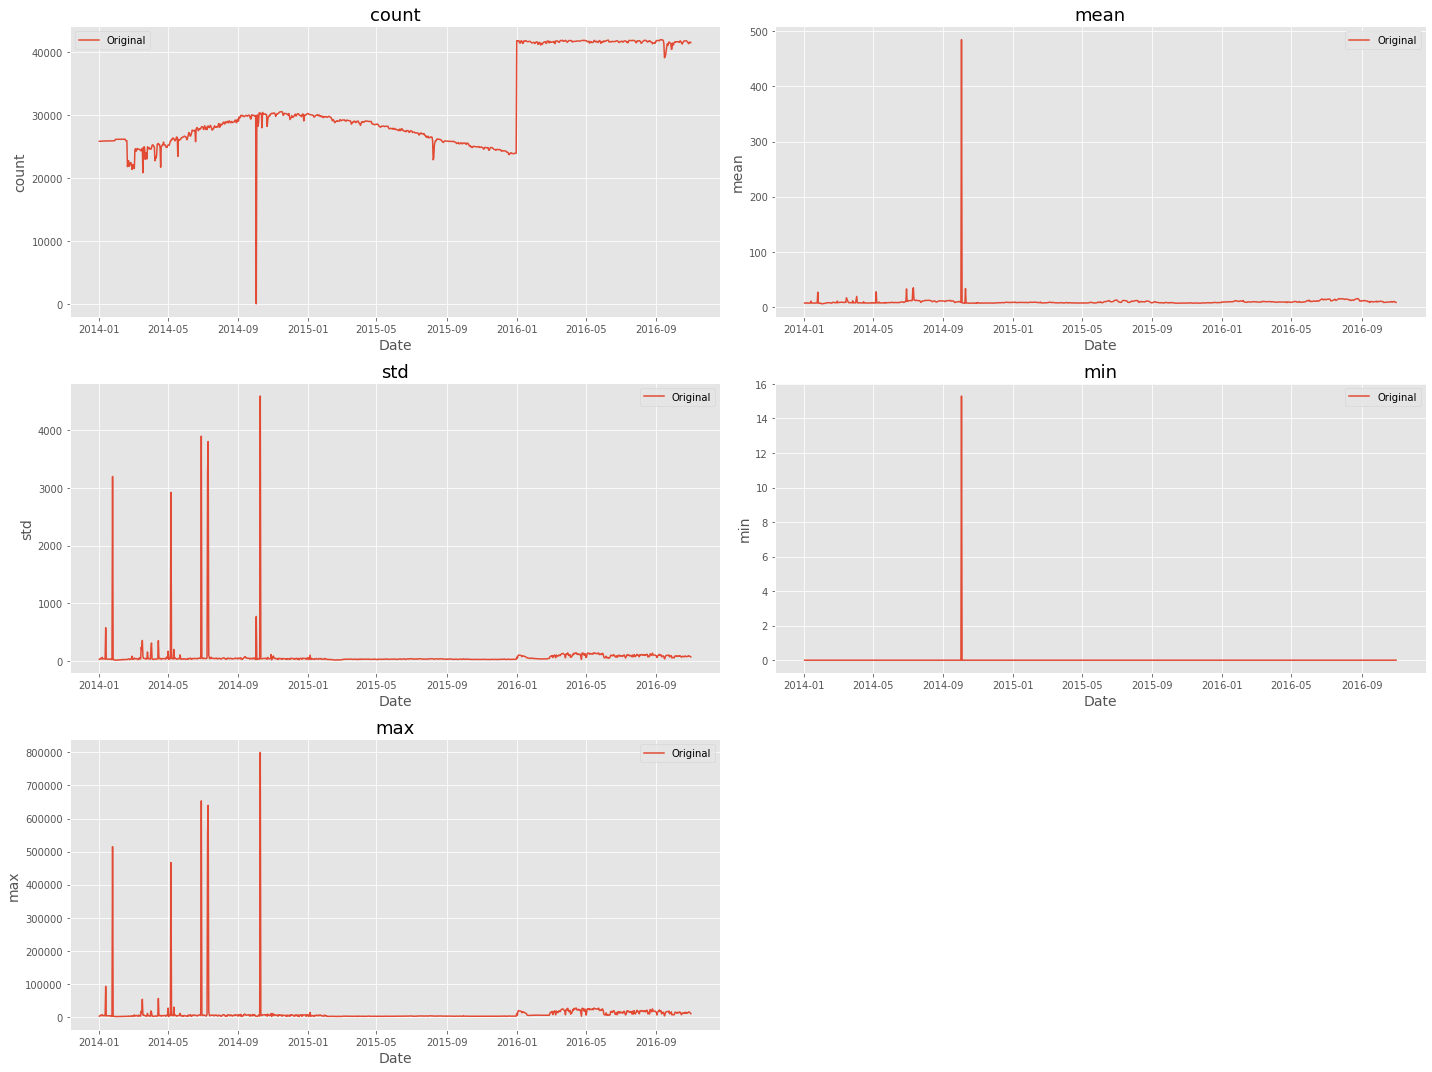

In [41]:
# Test the function for the original sorted dataframe
plot_description_dataframe(description_df)

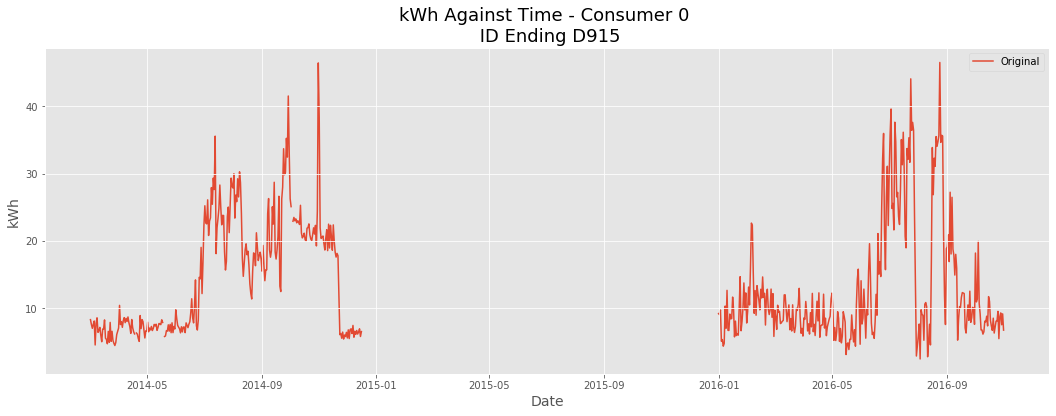

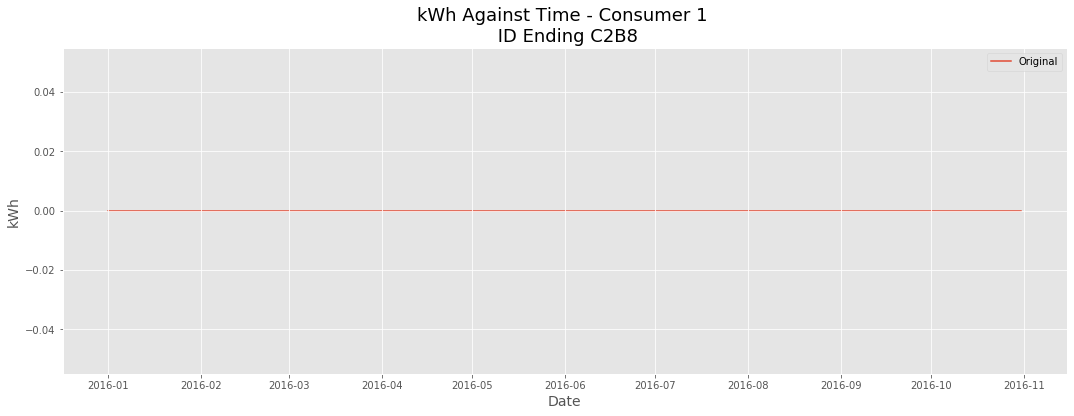

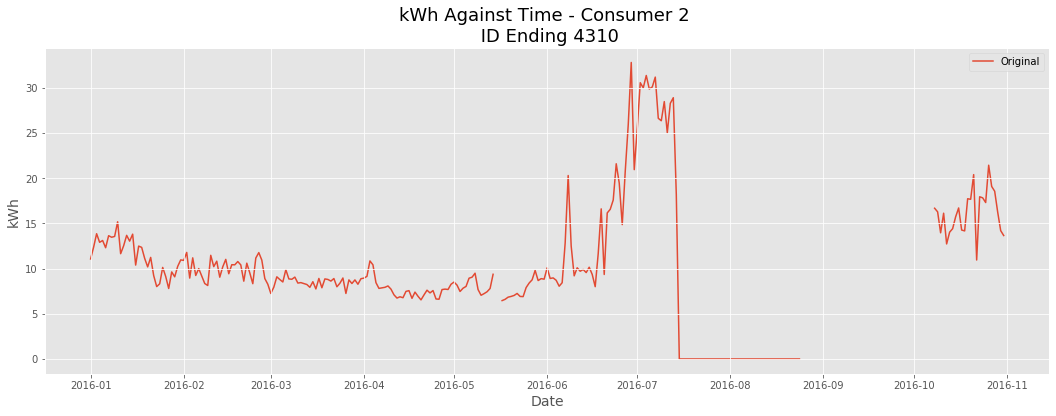

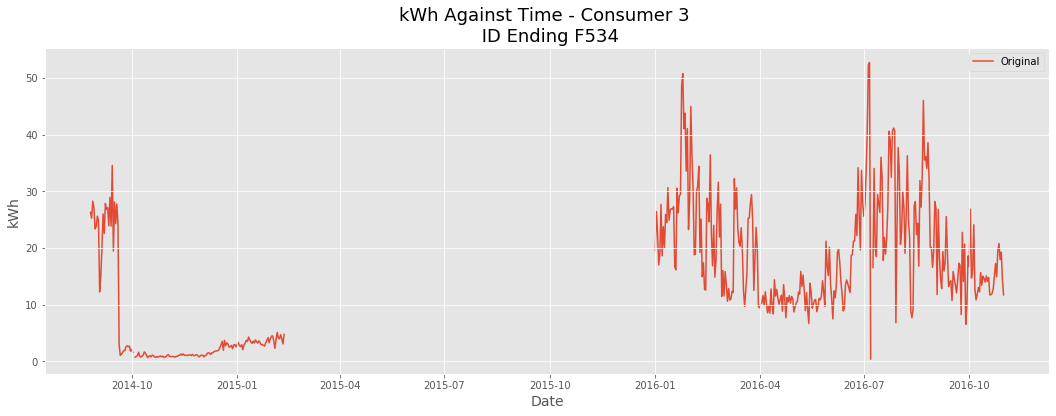

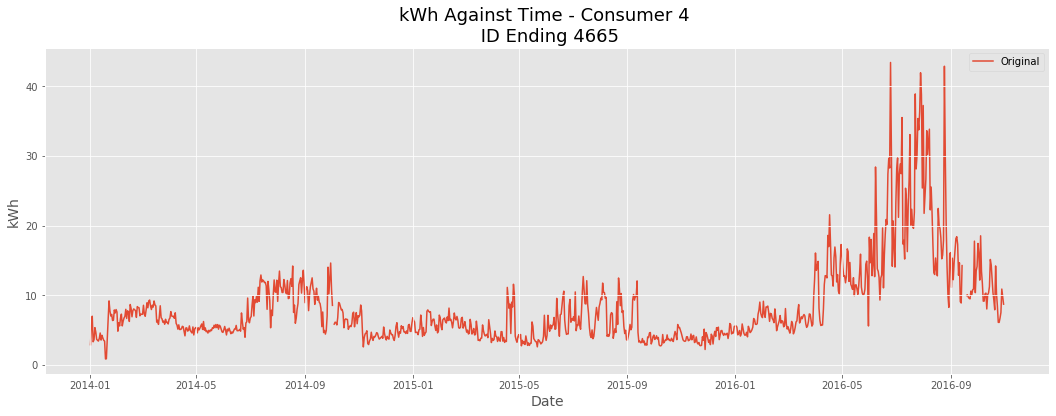

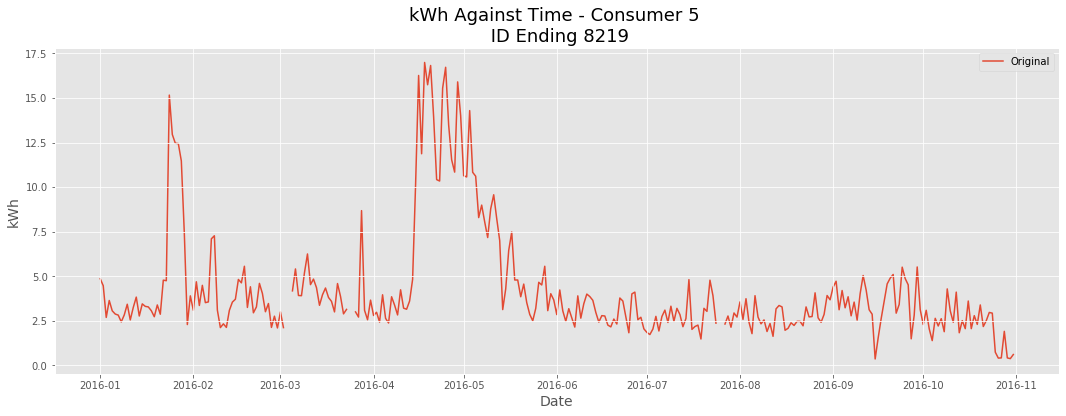

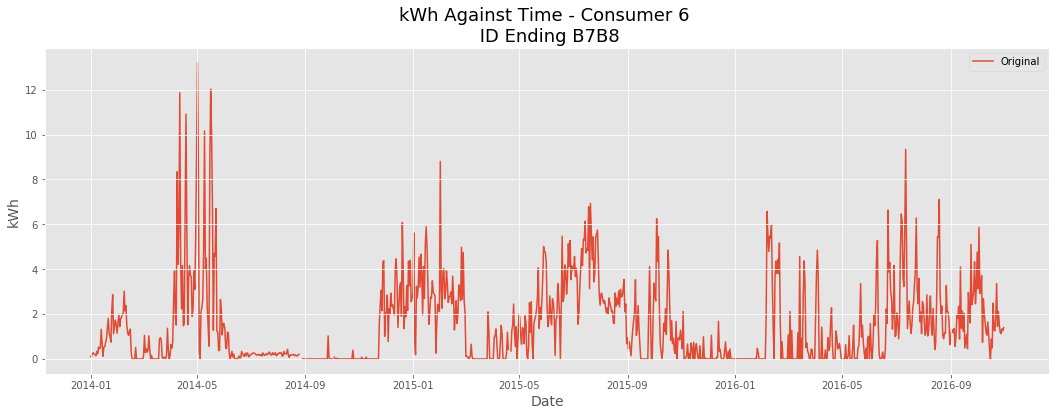

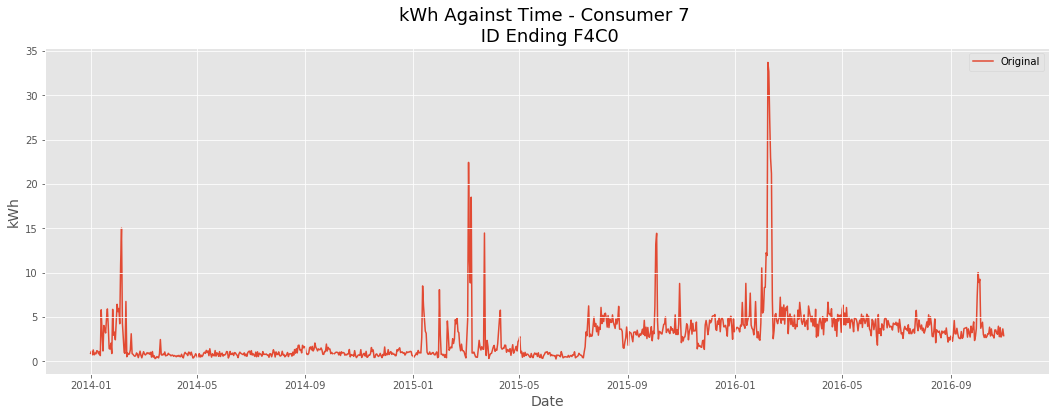

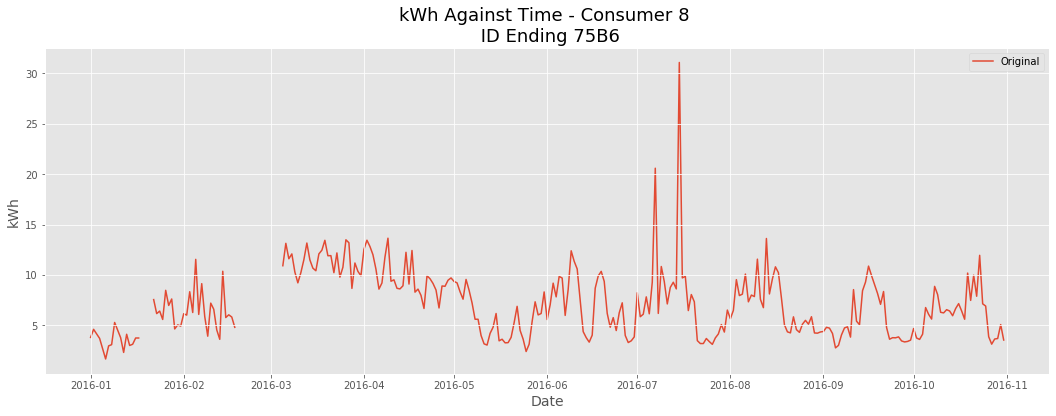

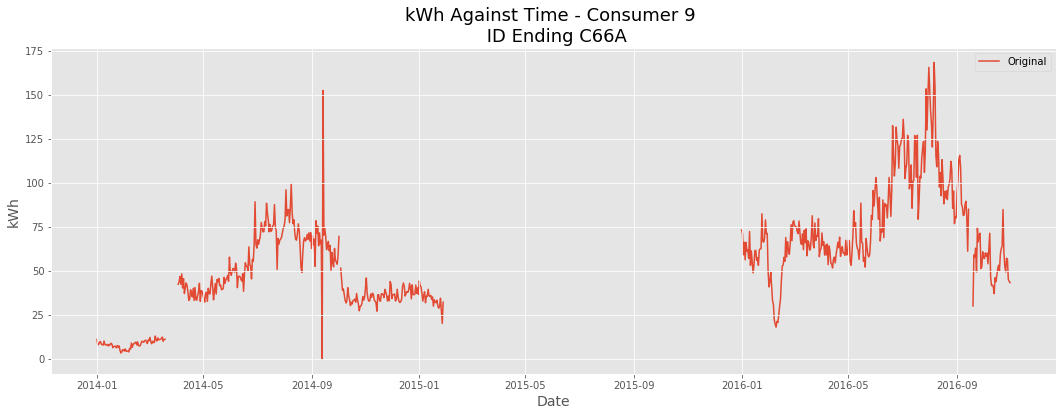

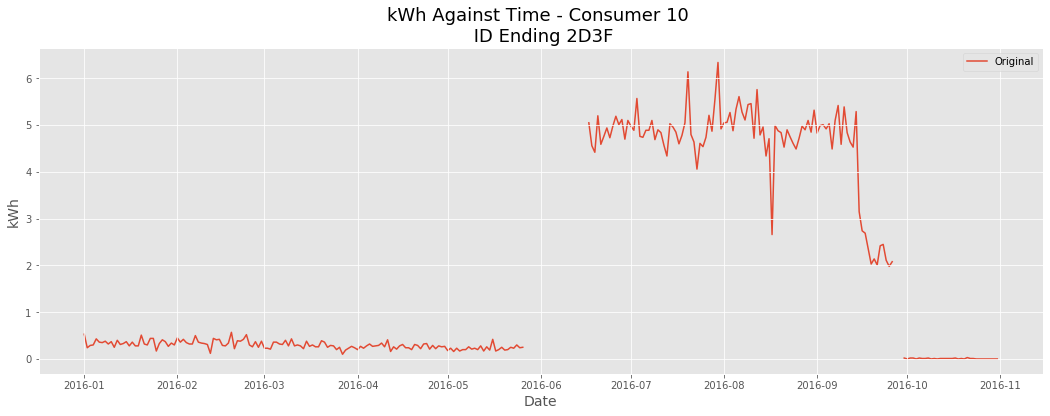

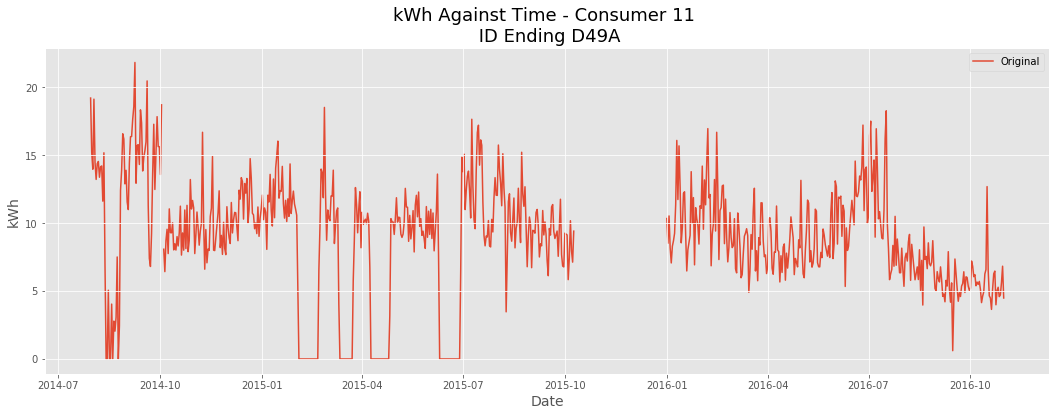

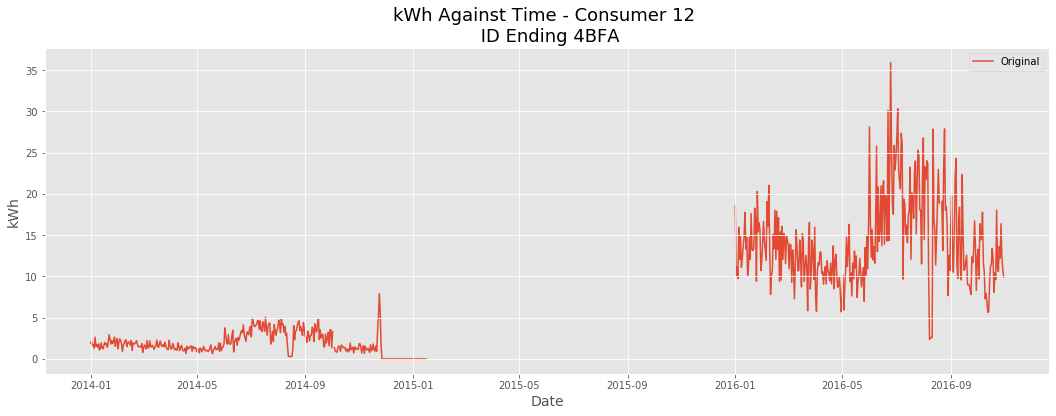

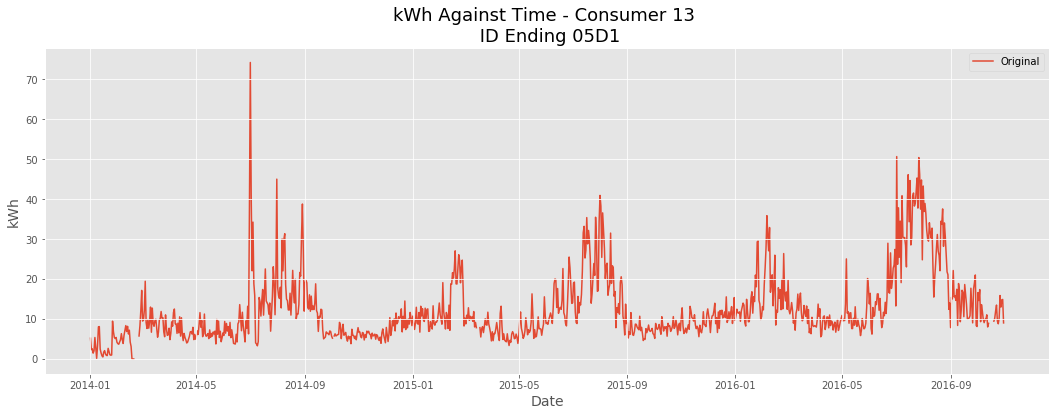

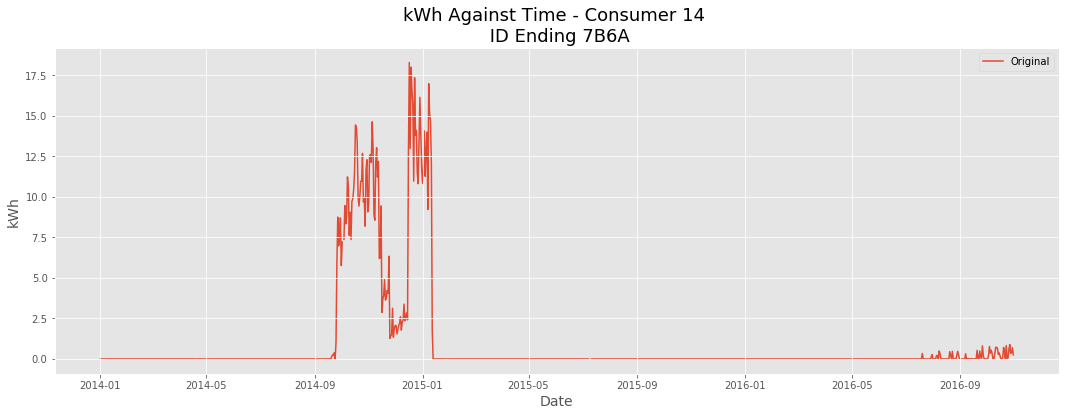

In [47]:
# Test the function for the first 15 consumers in the dataset
plot_consumer_kWhs(consumer_idx=np.arange(0, 15, 1), original_data=sorted_df)

### Visualizing Missing Values by Consumer - Before Processing
Want to visualize how many non-null values existed before the preprocessing step across the entire dataset. 

In [54]:
# Find's boolean mask of non-null values, then sums them by row - only checking kWhs
non_null_counts_by_consumer = sorted_df.iloc[:, 2:].notnull().sum(axis=1)

# Print first five values to check
non_null_counts_by_consumer.head()

0     591
1     304
2     259
3     472
4    1030
dtype: int64

#### Distribution of Non-Null Values

Text(0.5, 1.0, 'Distribution of Non-Null kWhs Before `NaN` Replacement')

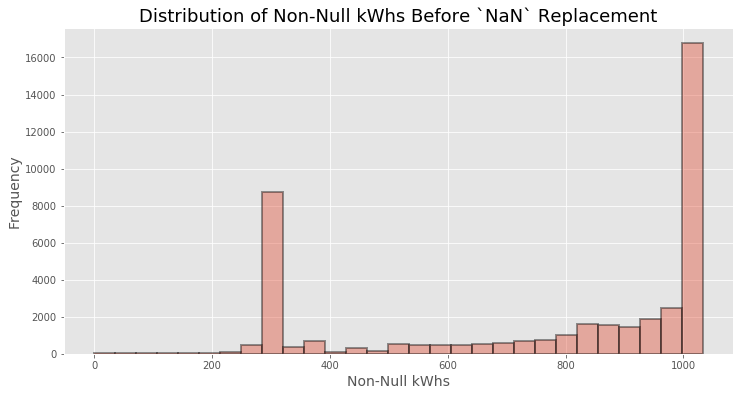

In [63]:
# Using a distribution plot to visualize non-null counts in data
plt.figure(figsize=(12, 6))
distplot(non_null_counts_by_consumer, kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
plt.xlabel('Non-Null kWhs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Non-Null kWhs Before `NaN` Replacement', fontsize=18)

#### Proportion of Non-Null Values by Consumer

Text(0.5, 1.0, 'Proportion of Non-Null Values By Consumer\nPreprocessing')

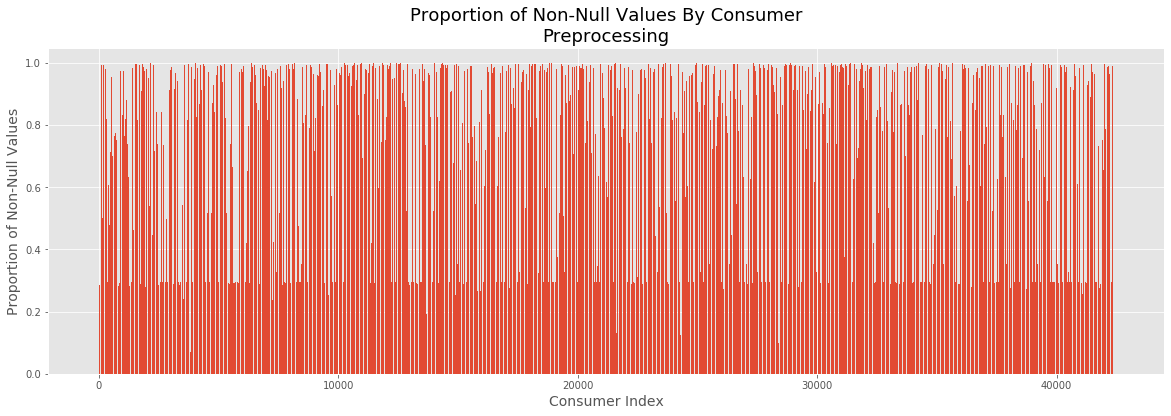

In [69]:
plt.figure(figsize=(20, 6))
plt.bar(x=non_null_counts_by_consumer.index, height=non_null_counts_by_consumer / (NUM_COLS - 2))
plt.xlabel('Consumer Index', fontsize=14)
plt.ylabel('Proportion of Non-Null Values', fontsize=14)
plt.title('Proportion of Non-Null Values By Consumer\nPreprocessing', fontsize=18)

### Zheng's Missing Value Replacement Rule

Zheng's rule for `NaN` replacement is as follows
- If the current value is defined, don't change it.
- If the current value is undefined (e.g. is `NaN`), then
  - If the previous **and** next values are defined, then the current value is the mean of the two adjacent values.
  - If either the previous **or** the next value is undefined, then the current value is 0.0.

#### Copying Data

In [0]:
# Making a deep copy so that I don't modify the original dataset
df_missing_replaced = sorted_df.copy(deep=True)

In [73]:
# Getting the number of consumers and kWhs 
NUM_CONSUMERS, NUM_DAYS = sorted_df.shape
print(f"Number of consumers (rows): {NUM_CONSUMERS}\nNumber of days (columns): {NUM_DAYS - 2}")

Number of consumers (rows): 42372
Number of days (columns): 1034


#### Head Before Processsing

In [74]:
# Head before replacing NaNs
df_missing_replaced.head()

CONS_NO  FLAG  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151     1  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...        9.86        8.72

[5 rows x 1036 columns]

#### `pandas`-based Processing

Very slow. Did not proceed with this. Was taking ~15 minutes for processing 4,000 consumers. 

In [0]:
# Timing this operation
import time 

In [0]:
t_start = time.time()

# For every consumer in the test dataset
for i in range(0, NUM_CONSUMERS):
    
    # Update every 400 consumers
    if (i % 400 == 0):
      t_epoch = time.time()
      print("Processing Consumer Number: {}\tTime Elapsed: {}".format(i, (t_epoch - t_start)/60))

    # And for every kWh value after the first day (which starts at index 3)
    for j in range(3, NUM_DAYS - 1):
        # Only modify the data if it is NaN
        if np.isnan(df_missing_replaced.iloc[i, j]):
            # Extract next and previous values
            next_val = df_missing_replaced.iloc[i, j + 1]
            prev_val = df_missing_replaced.iloc[i, j - 1]
            
            # Boolean conditions for replacement
            # Both adjacent values are not NaNs
            both_not_nan = ~np.isnan(prev_val) and ~np.isnan(next_val)
            
            # One of the two adjacent values is a NaN
            either_is_nan = np.isnan(prev_val) or np.isnan(next_val)
            
            # If both adjacent values are defined, replace missing with their mean
            if (both_not_nan):
                df_missing_replaced.iloc[i, j] = np.mean([next_val, prev_val])
                
            # If either adjacent value is NaN, replace missing with 0.0
            elif (either_is_nan):
                df_missing_replaced.iloc[i, j] = 0.0

t_end = time.time()

print(f"Time Taken: {(t_end - t_start / 60)}")

#### `numpy`-based Processing

Was much faster than the `pandas` approach.

In [0]:
# Attempting numpy array-based solution
kWhs = sorted_df.iloc[:, 2:].values

# Does it have the right shape
rows, cols = kWhs_nans_replaced.shape

In [87]:
# Record time at beginning of loop
t_0 = time.time()

# For every consumer
for i in range(0, rows):
  # Print a dot as an update after every 400 consumers
  if (i % 400  == 0):
    print(".", end="")

  # And for every value of that consumer
  for j in range(1, cols - 1):
    # If the current value is undefined
    if (np.isnan(kWhs[i, j])):
      if (~np.isnan(kWhs[i, j - 1]) and ~np.isnan(kWhs[i, j + 1])):
        kWhs[i, j] = np.mean([kWhs[i, j - 1], kWhs[i, j + 1]])
      elif(np.isnan(kWhs[i, j - 1]) or np.isnan(kWhs[i, j + 1])):
        kWhs[i, j] = 0.0

# Record time at end of loop
t_f = time.time()
print((t_f - t_0)/60)

..........................................................................................................3.0470900376637777


In [0]:
# Replacing kWh values with processed numpy array values in the dataframe
df_missing_replaced.iloc[:, 2:] = kWhs

In [0]:
# Remaining `NaN`s are in the first and last columns - replace with 0
df_missing_replaced.fillna(0, inplace=True)

#### Head After Processing

In [99]:
# Confirming `NaNs` have been replaced in the head
df_missing_replaced.head()

CONS_NO  FLAG  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151     1  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...        9.86        8.72

[5 rows x 1036 columns]

### Comparing kWhs - Before and After Processing

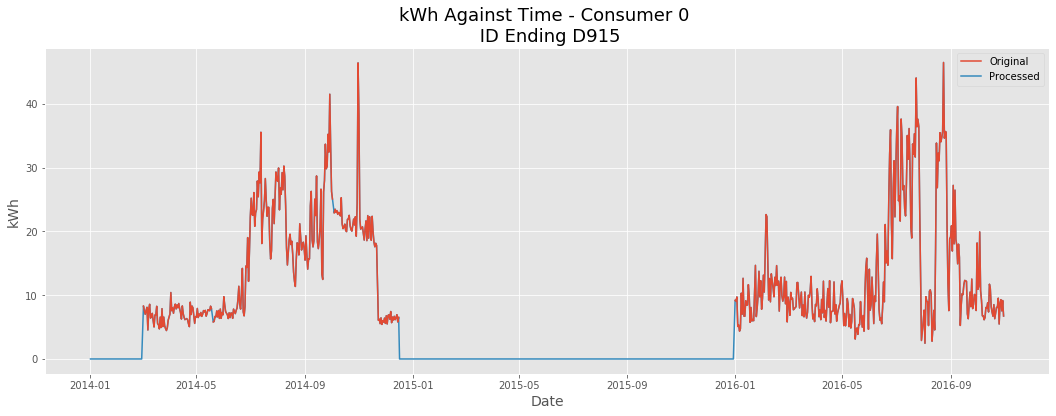

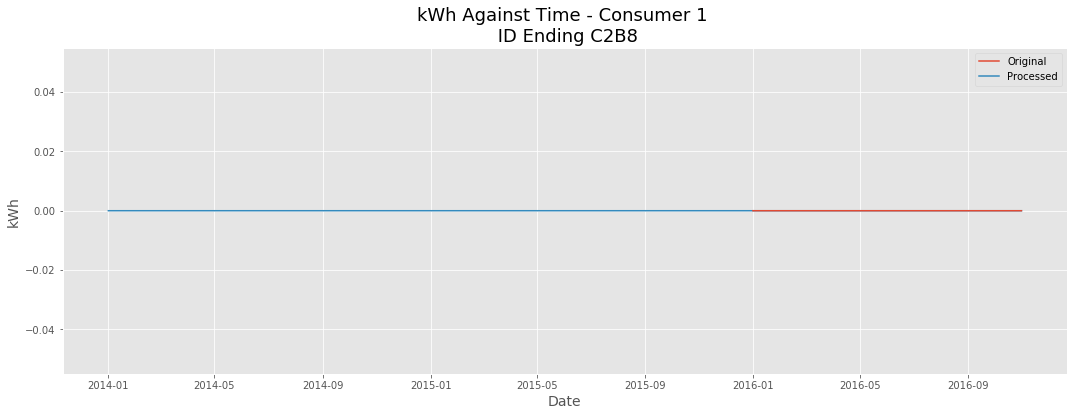

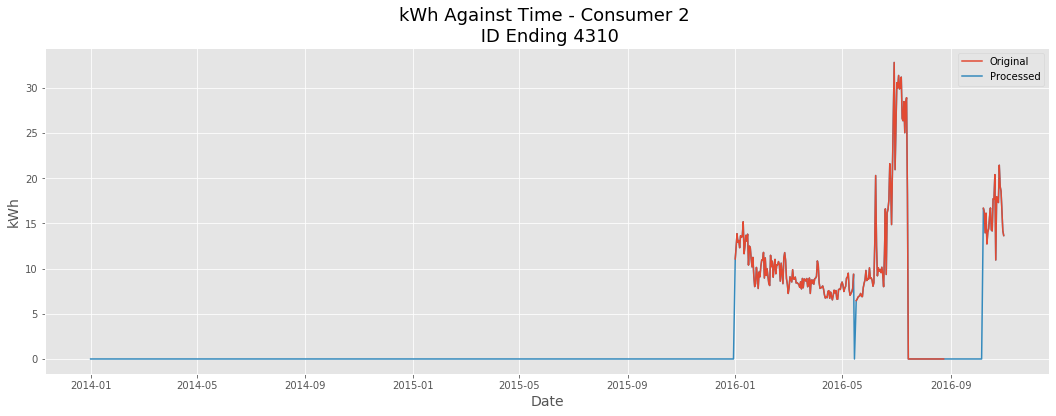

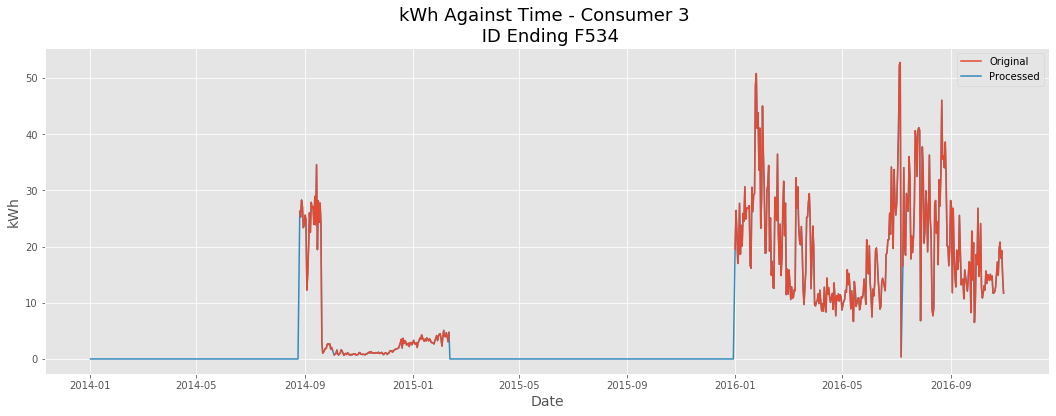

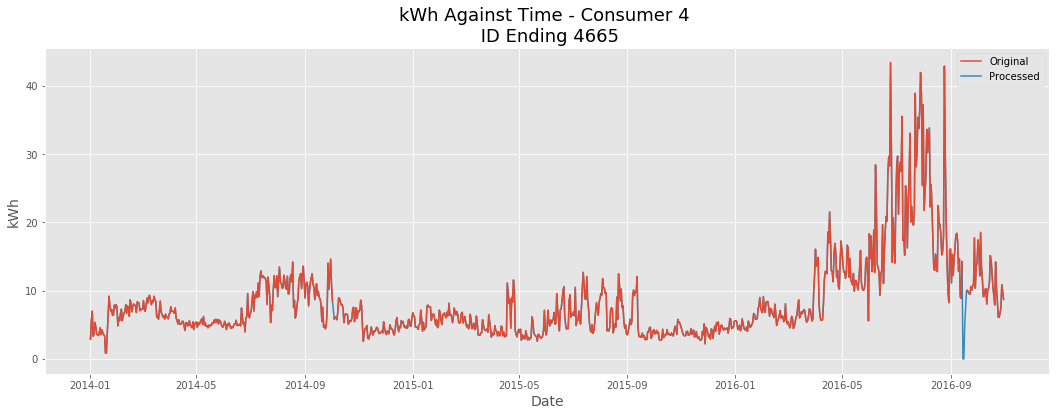

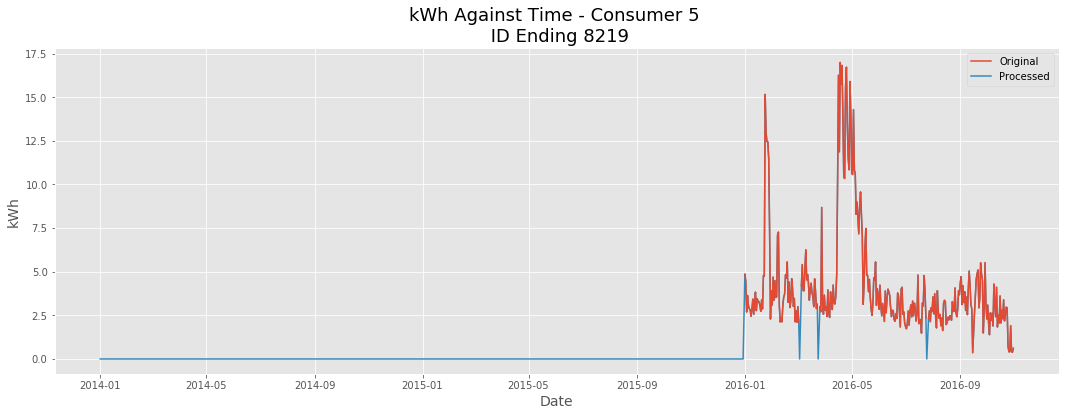

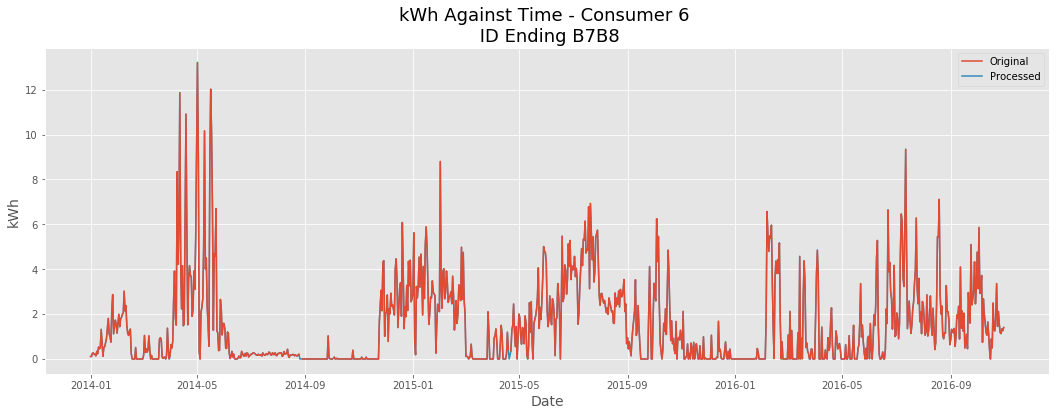

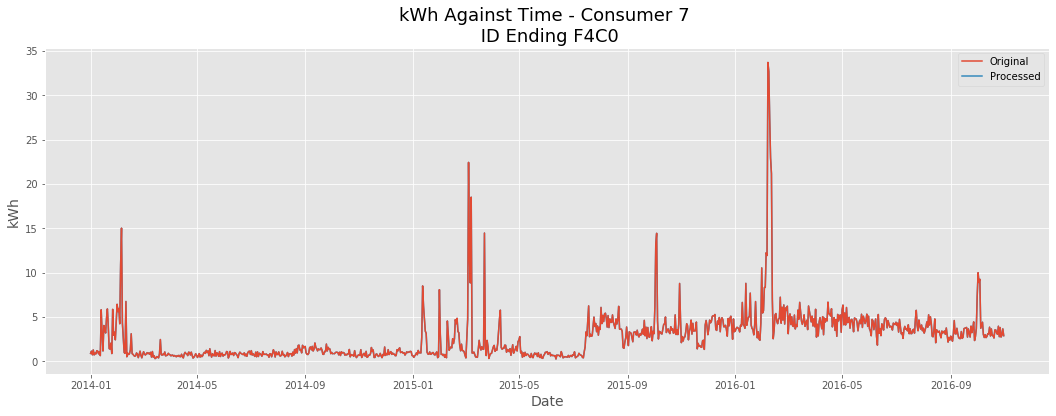

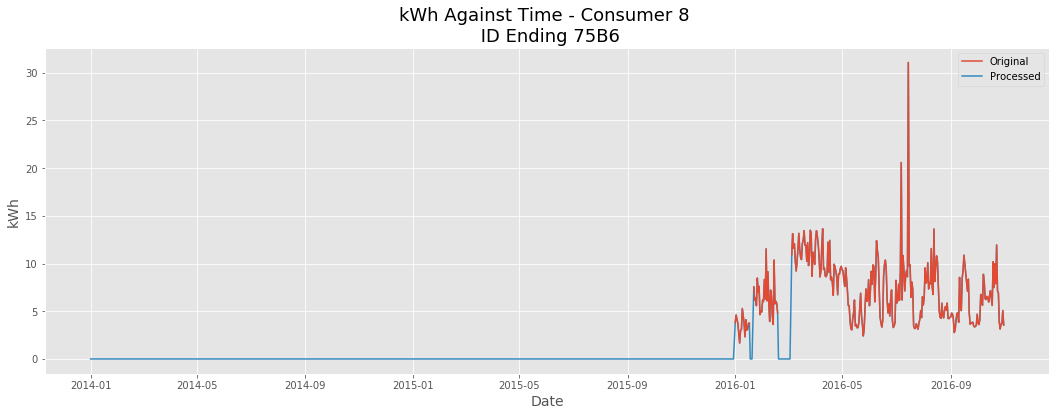

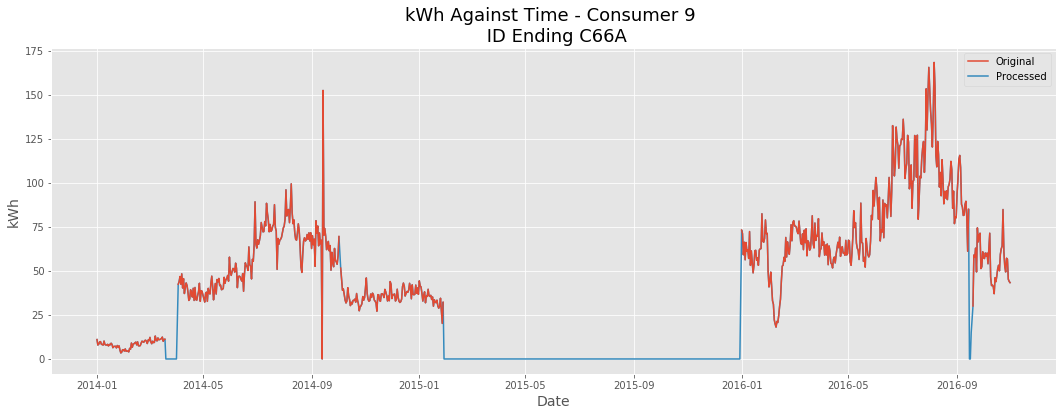

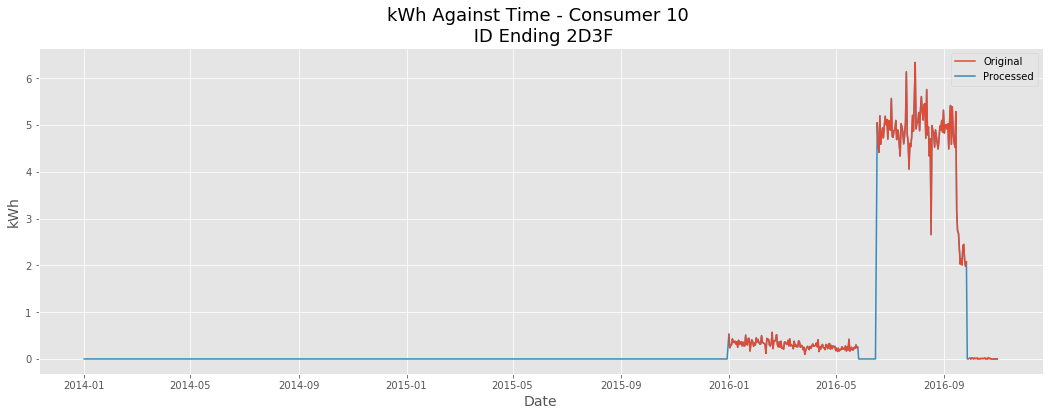

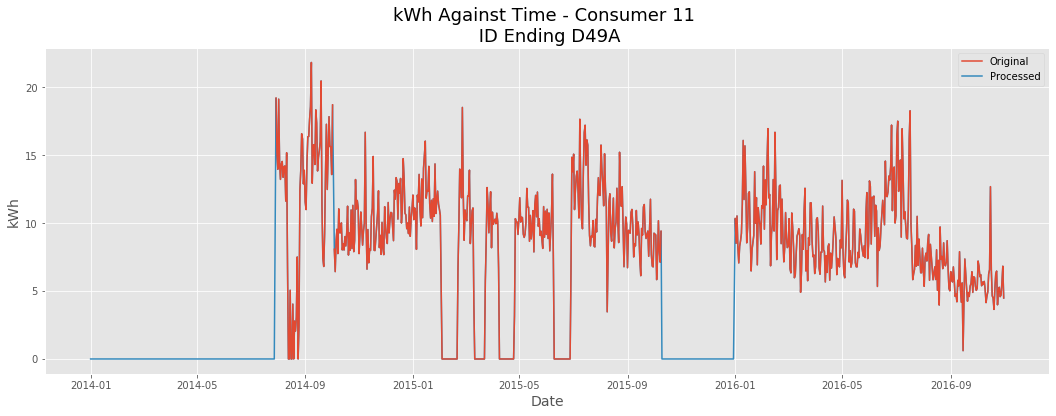

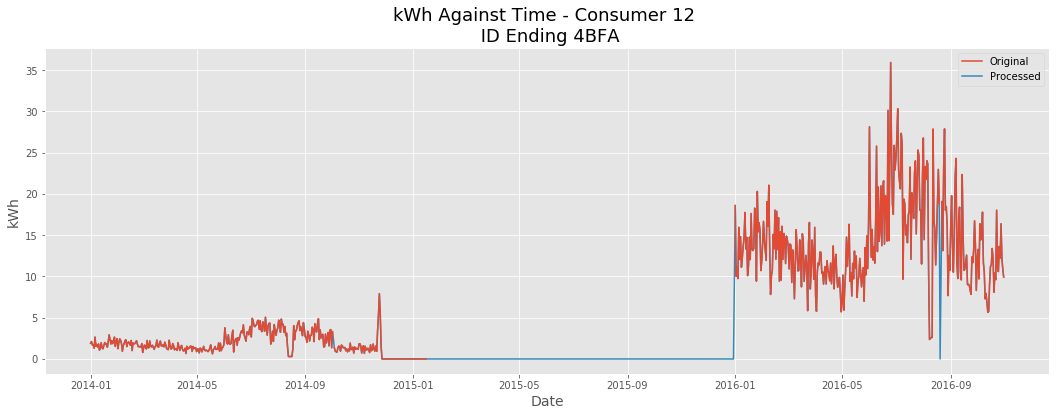

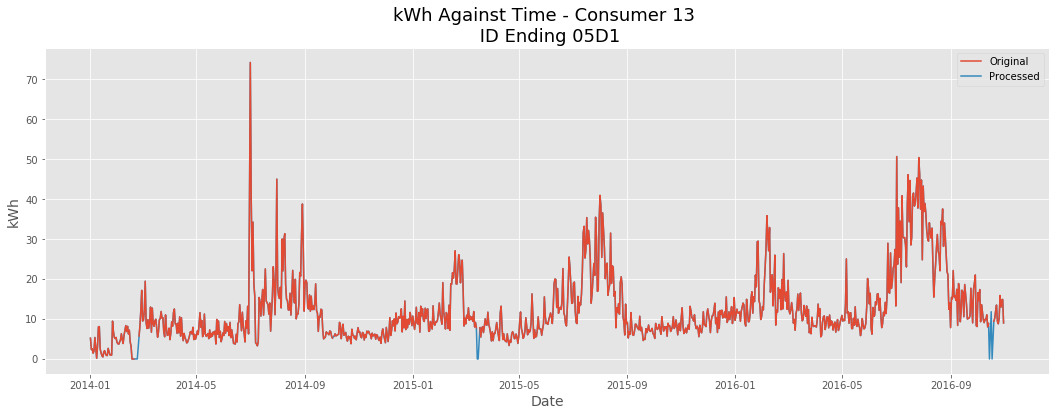

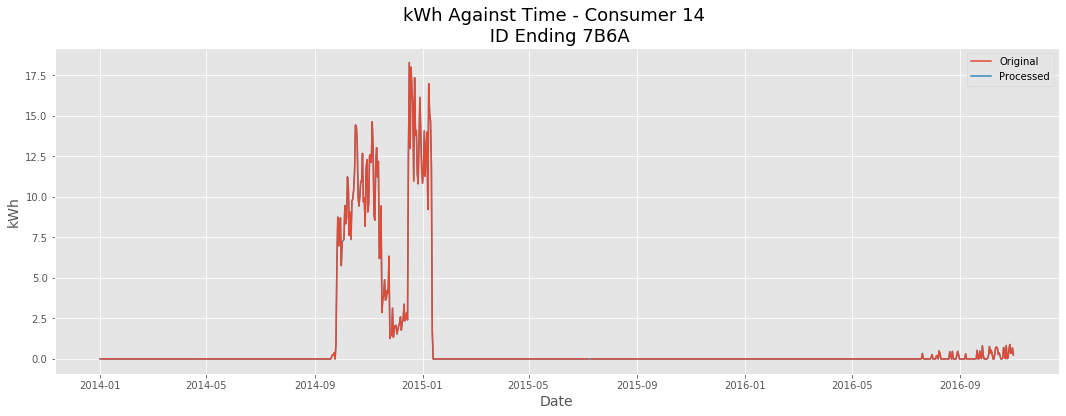

In [100]:
# Plotting comparison of kWh values for first 15 consumers
plot_consumer_kWhs(consumer_idx=np.arange(0, 15, 1), 
                   original_data=sorted_df, processed_data=df_missing_replaced, 
                   original_first=True)

### Comparing Description Metrics - Before and After Processing

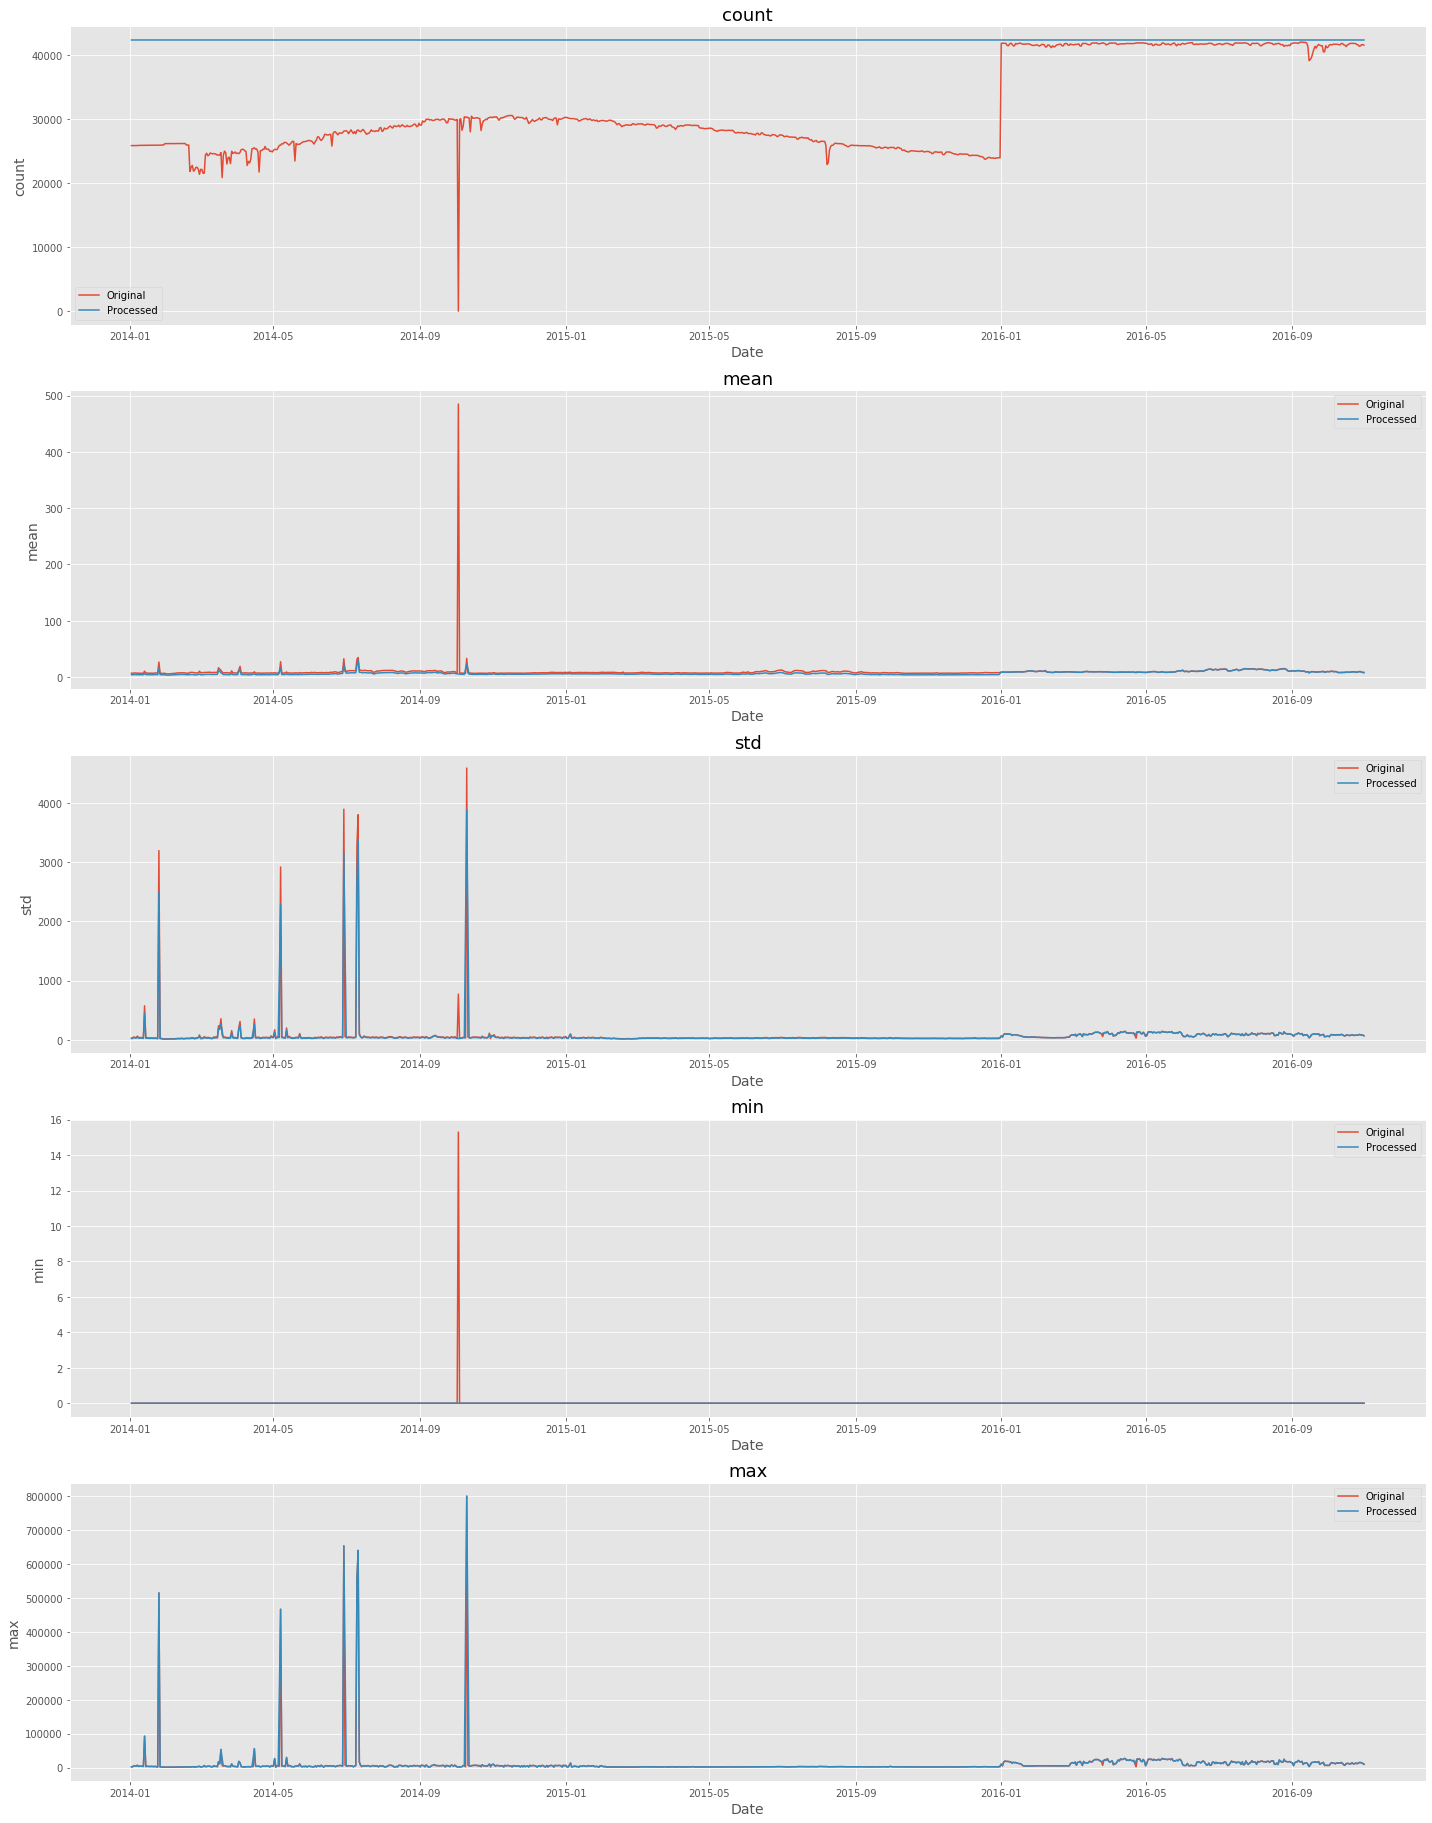

In [116]:
plot_description_dataframe(original_data=sorted_df.describe(), 
                           processed_data=df_missing_replaced.describe(),
                           subplot_rows=6, subplot_cols=1, figsize=(20, 30))

### Interpretation
- **Count** should consistently be the number of consumers in the dataset being processed (in this case 15).
- **Mean** value decreases after processing
    - before the processing, mean was the average of fewer non-null values, many of which were not 0. 
    - Distribution plot shows that after processing, the number of values near 0 increases from ~4000 to ~10000.
    - Not only does the replacement of a subset of NaNs with 0s and means increase the number of values over which the mean is averaged, but also drives down this average.
    - This is because the sum of values remains more or less the same when the majority of new values being added are 0. 
    - Assuming the sum of values to be nearly constant, as the number over which these values are averaged increases, the average or mean value also decreases.
- **Standard Deviation**: decreases after processing
    - The standard deviation is given by 
    $$\sigma = \sqrt{\frac{\Sigma{x_i - \mu}}{N}}$$
    - We have established that $\mu$ decreases postprocessing. As $\sigma$ is proportional to $\mu$, this means the effect of decreasing mean is decreasing standard deviation
    - Furthermore, $\sigma$ is inversely proportional to $N$, which increases with missing value replacement. 
- **Minimum Value** should always be 0 now that all `NaN`s have been replaced with 0s. Before replacement, the minimum value was the smallest non-null value, which need not have been zero.
- **Maximum Value** almost perfectly tracks the original data, as the addition of a 0s or mean values in place of `NaN`s can never replace an existing maximum value.

In [0]:
%matplotlib notebook

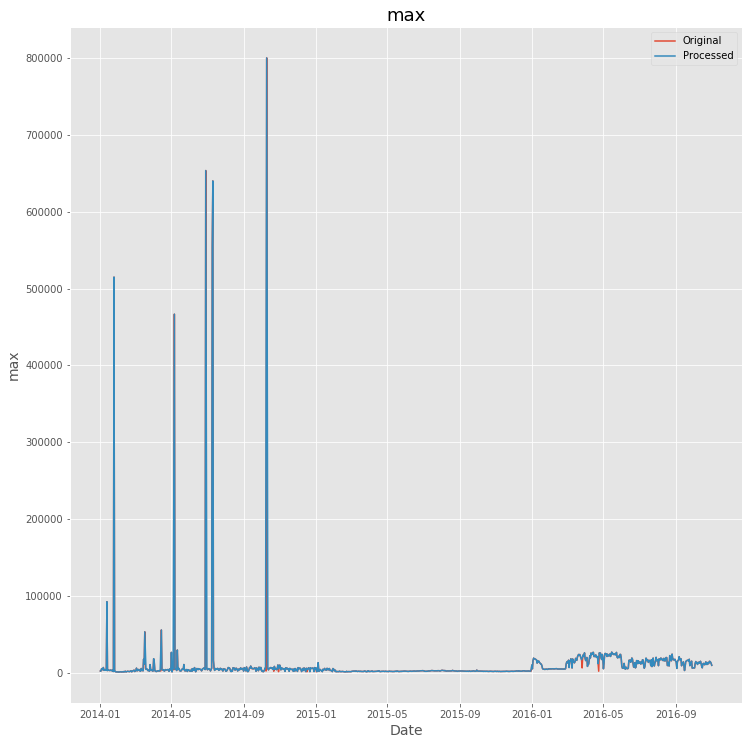

In [121]:
plot_description_dataframe(original_data=sorted_df.describe(), 
                           processed_data=df_missing_replaced.describe(), 
                           figsize=(20, 30), cols=['max'])

### Plotting Distributions Pre and Post Processing

In [0]:
# Unravel the original sorted data into a single long array
sorted_vals_unraveled = sorted_df.iloc[:, 2:].values.ravel()

In [0]:
# Remove all the NaNs from this array of kWh values
sorted_vals_filtered = sorted_vals_unraveled[~np.isnan(sorted_vals_unraveled)]

In [0]:
# Check that no NaNs exist in the original kWhs after filtering
np.any(np.isnan(sorted_vals_filtered))

In [0]:
# Comparing distributions of original and processed values
# Original data separately
plt.figure(figsize=(12, 6))
distplot(sorted_vals_filtered, kde=False, label='Original')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Processed data separately
plt.figure(figsize=(12, 6))
distplot(df_missing_replaced.iloc[:, 2:].values.ravel(), 
         kde=False, label='Processed')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


# On the same graph
plt.figure(figsize=(12, 6))
distplot(sorted_vals_filtered, kde=False, label='Original')
distplot(df_missing_replaced.iloc[:, 2:].values.ravel(), 
         kde=False, label='Processed')
plt.xlabel('kWh Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distributions of kWh Values\nBefore and After Missing Value Replacement', fontsize=18)
plt.legend()
plt.tight_layout()

### Comparing Description Params

#### Interpretation
- **Count** should consistently be the number of consumers in the dataset being processed (in this case 15).
- **Mean** value decreases after processing
    - before the processing, mean was the average of fewer non-null values, many of which were not 0. 
    - Distribution plot shows that after processing, the number of values near 0 increases from ~4000 to ~10000.
    - Not only does the replacement of a subset of NaNs with 0s and means increase the number of values over which the mean is averaged, but also drives down this average.
    - This is because the sum of values remains more or less the same when the majority of new values being added are 0. 
    - Assuming the sum of values to be nearly constant, as the number over which these values are averaged increases, the average or mean value also decreases.
- **Standard Deviation**: decreases after processing
    - The standard deviation is given by 
    $$\sigma = \sqrt{\frac{\Sigma{x_i - \mu}}{N}}$$
    - We have established that $\mu$ decreases postprocessing. As $\sigma$ is proportional to $\mu$, this means the effect of decreasing mean is decreasing standard deviation
    - Furthermore, $\sigma$ is inversely proportional to $N$, which increases with missing value replacement. 
- **Minimum Value** should always be 0 now that all `NaN`s have been replaced with 0s. Before replacement, the minimum value was the smallest non-null value, which need not have been zero.
- **Maximum Value** almost perfectly tracks the original data, as the addition of a 0s or mean values in place of `NaN`s can never replace an existing maximum value.

### Saving Interpolated Data

In [0]:
df_missing_replaced.to_csv('./data-interpolated.csv', index=False)

## Outliers

Zheng says outliers have to be identified based on the application of the three-sigma rule on a consumer basis. In other words

1. Find the mean and standard deviation of kWh consumption values for a single consumer.
2. Find a threshold value epsilon = mean + 2 * standard deviation.
3. All values that exceed this threshold are outliers, and need to be replaced with the threshold value.

### Outliers by Consumer

In [0]:
interpolated_data = pd.read_csv('./data-interpolated.csv')

In [0]:
interpolated_data = df_missing_replaced.copy()

In [215]:
interpolated_data.head()

CONS_NO  FLAG  ...  2016-10-30  2016-10-31
0  0387DD8A07E07FDA6271170F86AD9151     1  ...        9.16        6.74
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1  ...        0.00        0.00
2  4B75AC4F2D8434CFF62DB64D0BB43103     1  ...       14.20       13.66
3  B32AC8CC6D5D805AC053557AB05F5343     1  ...       14.46       11.72
4  EDFC78B07BA2908B3395C4EB2304665E     1  ...        9.86        8.72

[5 rows x 1036 columns]

In [216]:
interpolated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016-10-31
dtypes: float64(1034), int64(1), object(1)
memory usage: 335.2+ MB


In [217]:
# Extract only the kWhs
kWhs = interpolated_data.iloc[:, 2:]
kWhs.head()

2014-01-01  2014-01-02  2014-01-03  ...  2016-10-29  2016-10-30  2016-10-31
0         0.0        0.00        0.00  ...        7.54        9.16        6.74
1         0.0        0.00        0.00  ...        0.00        0.00        0.00
2         0.0        0.00        0.00  ...       16.25       14.20       13.66
3         0.0        0.00        0.00  ...       19.26       14.46       11.72
4         2.9        5.64        6.99  ...       10.89        9.86        8.72

[5 rows x 1034 columns]

In [0]:
# Making a copy of raw data prior to processing
kWhs_outliers_removed = kWhs.copy()

In [219]:
kWhs_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42372 entries, 0 to 42371
Columns: 1034 entries, 2014-01-01 to 2016-10-31
dtypes: float64(1034)
memory usage: 334.6 MB


In [220]:
kWhs_outliers_removed.head()

2014-01-01  2014-01-02  2014-01-03  ...  2016-10-29  2016-10-30  2016-10-31
0         0.0        0.00        0.00  ...        7.54        9.16        6.74
1         0.0        0.00        0.00  ...        0.00        0.00        0.00
2         0.0        0.00        0.00  ...       16.25       14.20       13.66
3         0.0        0.00        0.00  ...       19.26       14.46       11.72
4         2.9        5.64        6.99  ...       10.89        9.86        8.72

[5 rows x 1034 columns]

In [221]:
NUM_CONSUMERS, NUM_DAYS = kWhs_outliers_removed.shape
print(f"Number of consumers: {NUM_CONSUMERS}\nNumber of Days:{NUM_DAYS}")

Number of consumers: 42372
Number of Days:1034


In [0]:
# Compute means and standard deviations for all consumers
means_by_consumer = kWhs.mean(axis=1)
stds_by_consumer = kWhs.std(axis=1)

# Confirming that there is one mean and standard deviation per consumer
assert(len(means_by_consumer) == len(stds_by_consumer))
assert(len(means_by_consumer) == NUM_CONSUMERS)

In [0]:
# Use the mean and standard deviation to compute the threshold for each consumer
thresholds = means_by_consumer + 2 * stds_by_consumer

In [224]:
# Replacing outliers for each consumer 
for i in range(0, NUM_CONSUMERS, 1):
  # Update while processing by print a dot 
  if (i % 400 == 0):
    print(".", end="")

    # Compare each value (`kWh`) of each row (.iloc[i]) with its corresponding threshold
    # If exceeds threshold, replace with threshold. Otherwise, leave unchanged
    # Lambda expression + apply for faster code
    kWhs_outliers_removed.iloc[i] = kWhs_outliers_removed.iloc[i].apply(lambda kWh : thresholds[i] if kWh > thresholds[i] else kWh)

..........................................................................................................

In [225]:
kWhs_outliers_removed.head()

2014-01-01  2014-01-02  2014-01-03  ...  2016-10-29  2016-10-30  2016-10-31
0         0.0        0.00        0.00  ...        7.54        9.16        6.74
1         0.0        0.00        0.00  ...        0.00        0.00        0.00
2         0.0        0.00        0.00  ...       16.25       14.20       13.66
3         0.0        0.00        0.00  ...       19.26       14.46       11.72
4         2.9        5.64        6.99  ...       10.89        9.86        8.72

[5 rows x 1034 columns]

In [0]:
outliersRemoved = kWhs_outliers_removed.copy()

In [0]:
outliersRemoved.insert(0, 'CONS_NO', df_missing_replaced[['CONS_NO']])
outliersRemoved.insert(1, 'FLAG', df_missing_replaced[['FLAG']])

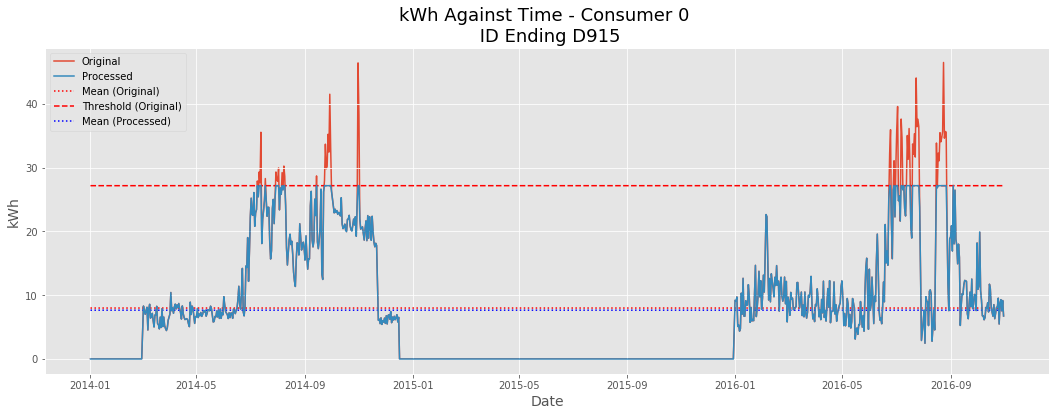

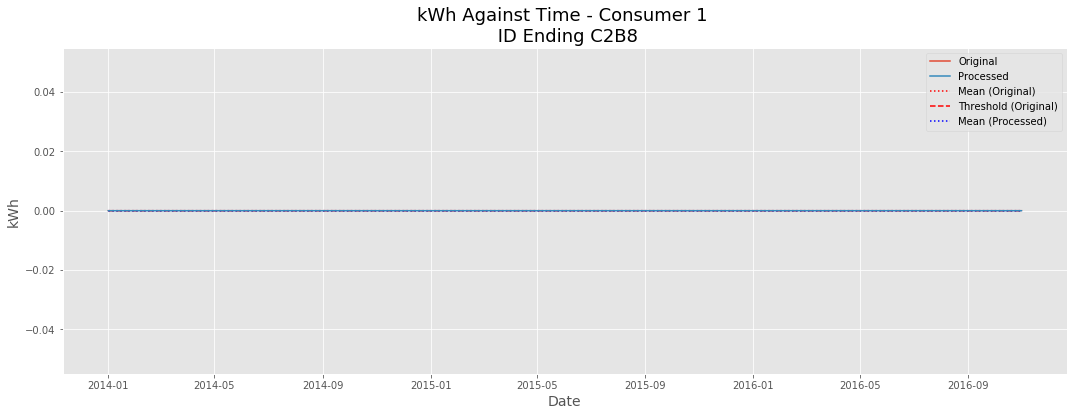

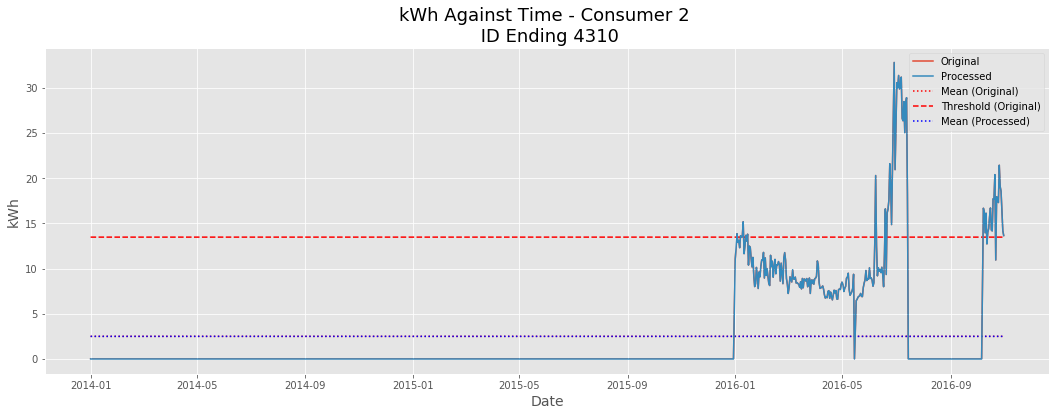

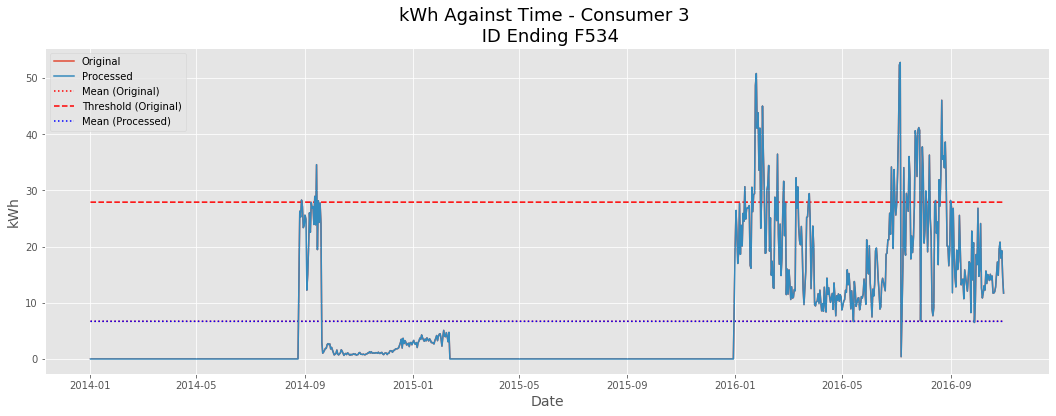

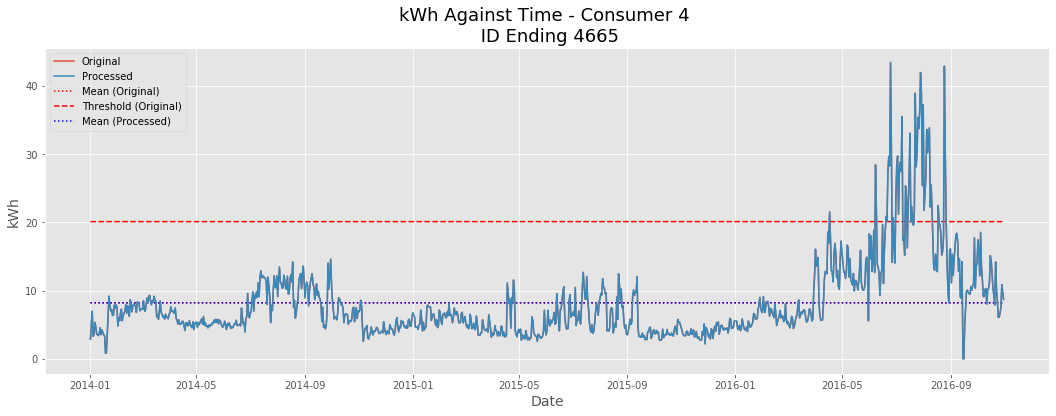

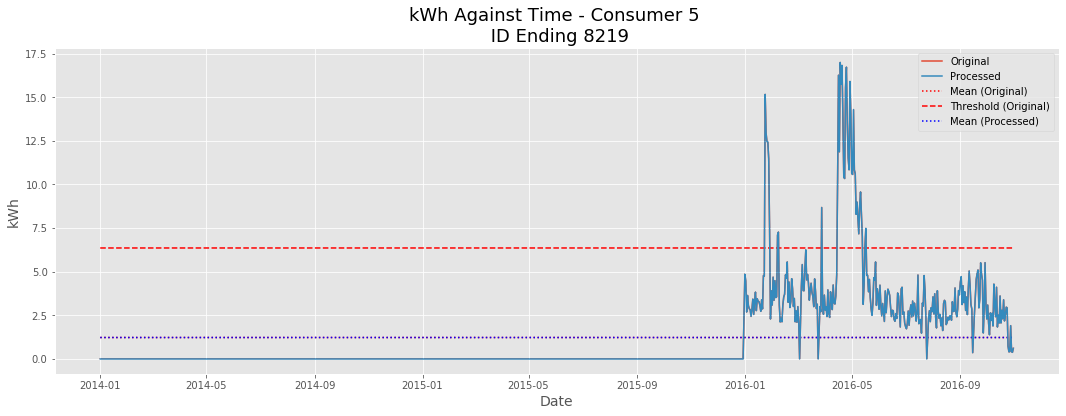

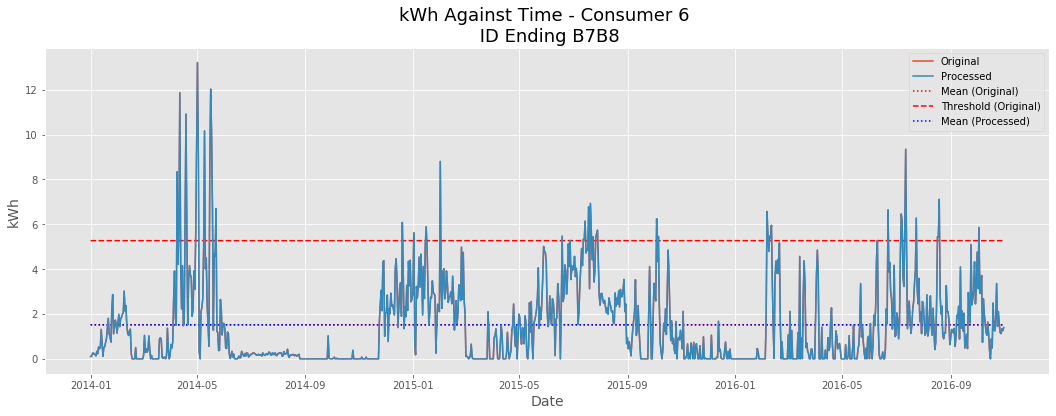

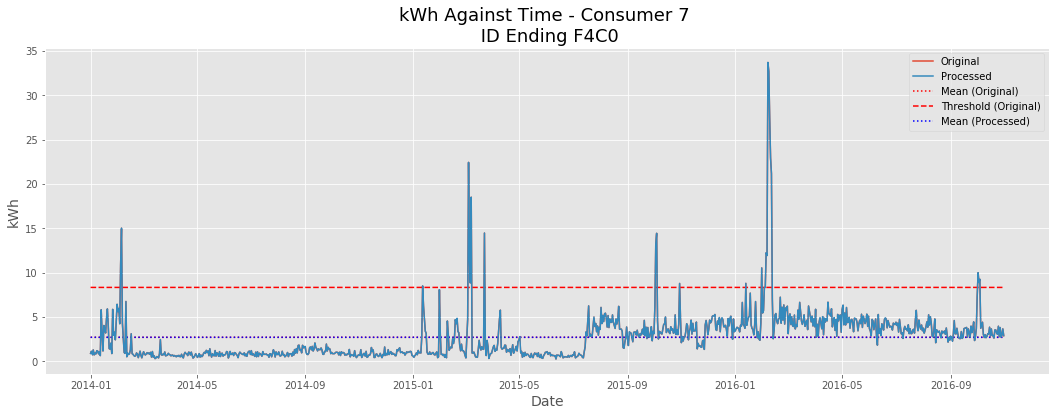

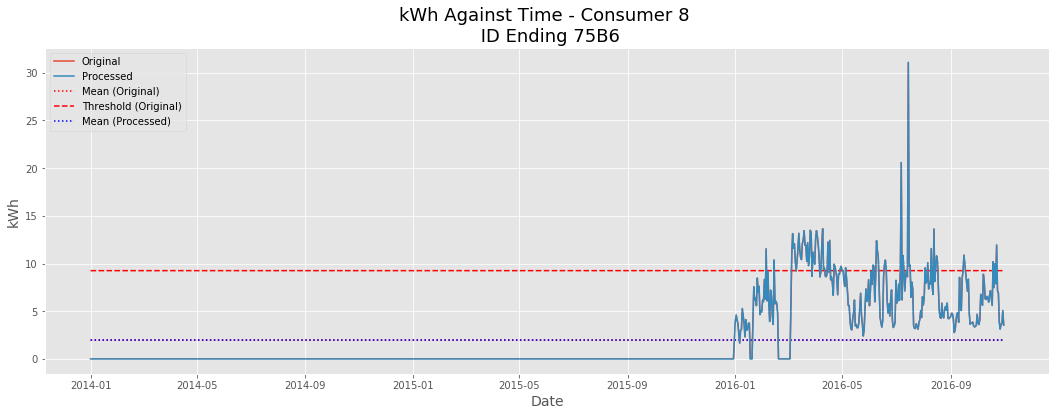

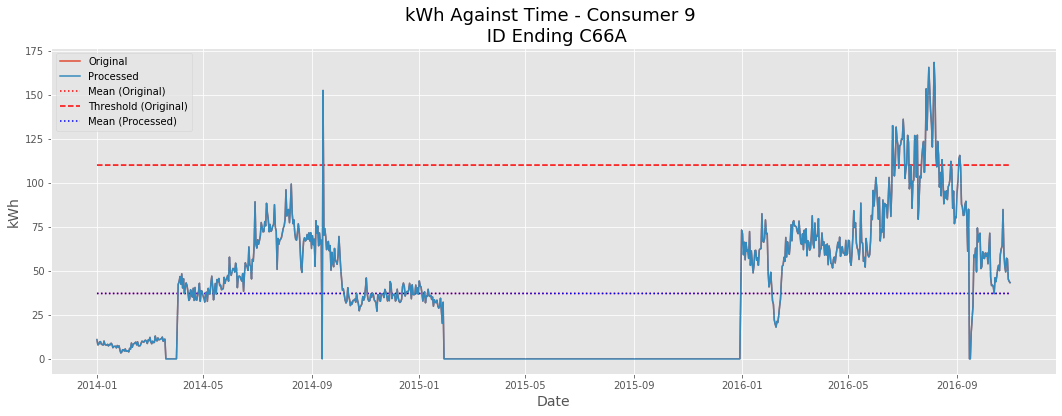

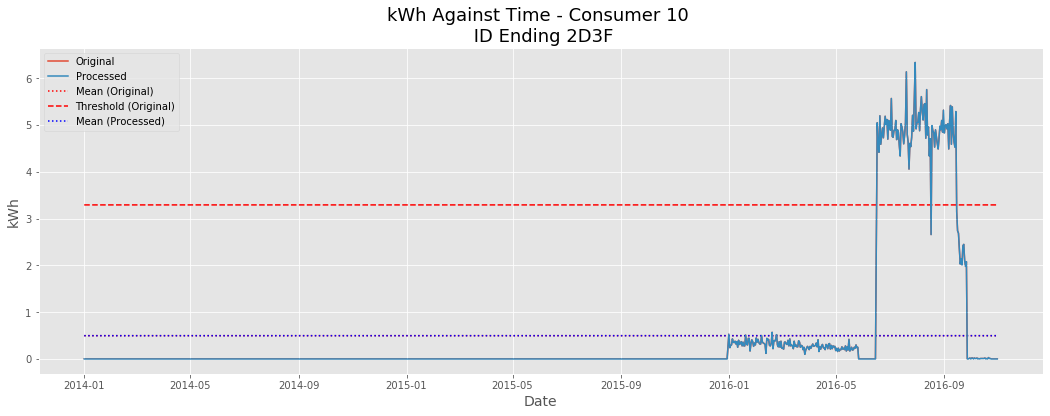

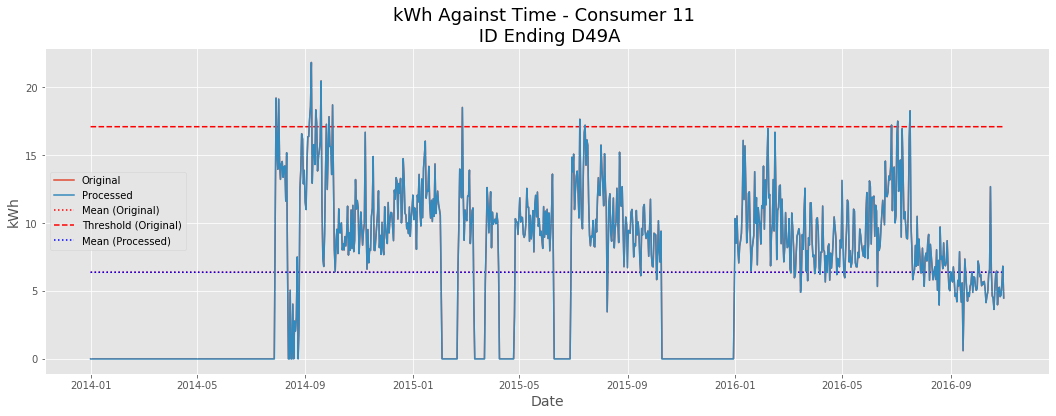

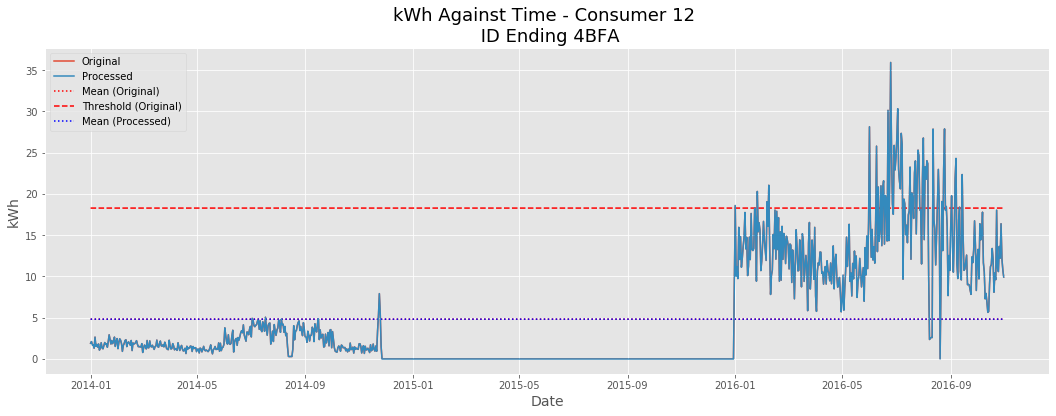

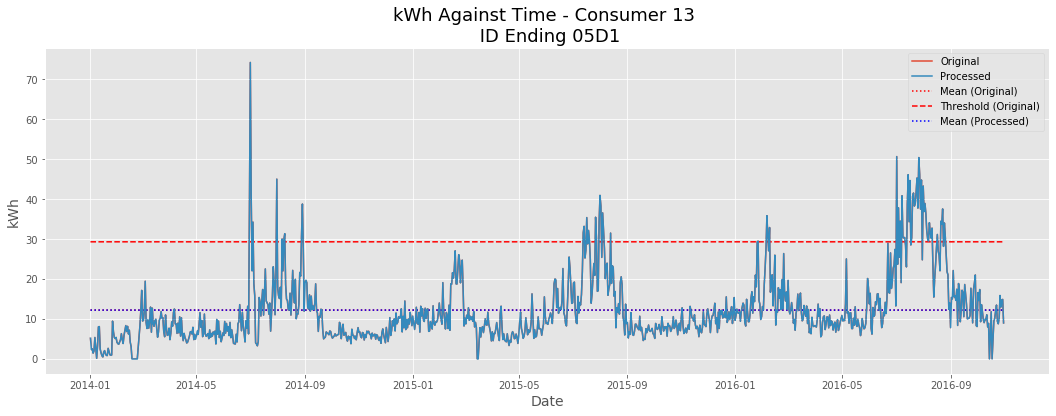

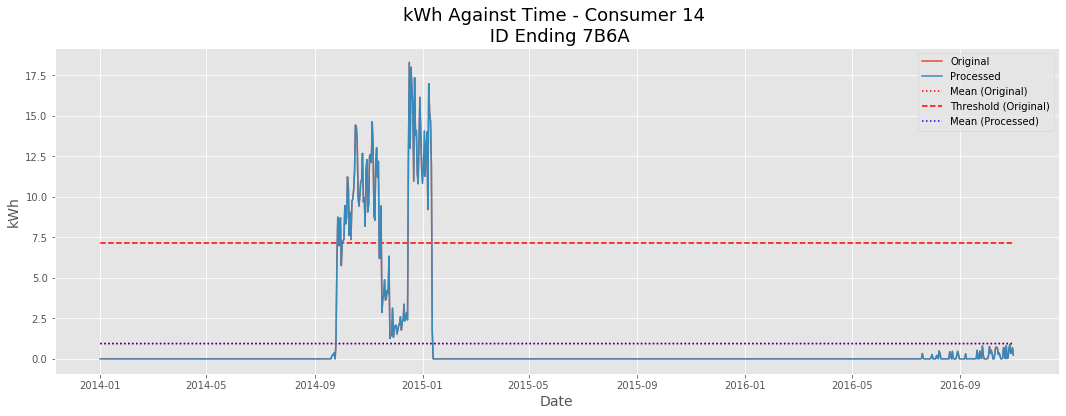

In [228]:
# Compare kWh consumption patterns before and after processing
plot_consumer_kWhs(consumer_idx=np.arange(0, 15), 
                   original_data=interpolated_data,
                   processed_data=outliersRemoved, 
                   plot_mean_std=True, 
                   original_first=False)

### Interpretation
- There is a GPU-related error in this processing phase.
- For starters, the entire `apply` process takes ~0.5s: far too little time for 42,372 x 1034 dataset, even with a GPU.
- When I plotted kWhs graphs of the original data and data with outliers removed, I got the correct trends for all but the first consumer.
- I observed this trend to be consistent regardless of the consumers I visualized.
- The first consumer's results were correct: processed kWhs did not exceed the mean + 2 * std theshold.
- But all others were virtually the same as their preprocessed counterparts.
- I fixed this by running the same code with a CPU on my laptop.
- It took longer, but the results are perfect.

### Correct `outliersRemoved` Dataset Results

These results were obtained by running the `apply` and `lambda` expression for outlier capping on a CPU instead of the Google CoLab GPU that was used for all other computations in the notebook.

In [10]:
# Original, interpolated data containing outliers
interpolated_data = pd.read_csv('./data-interpolated.csv')

# Correctly processed data
outliers_removed = pd.read_csv('./outliersRemoved.csv')

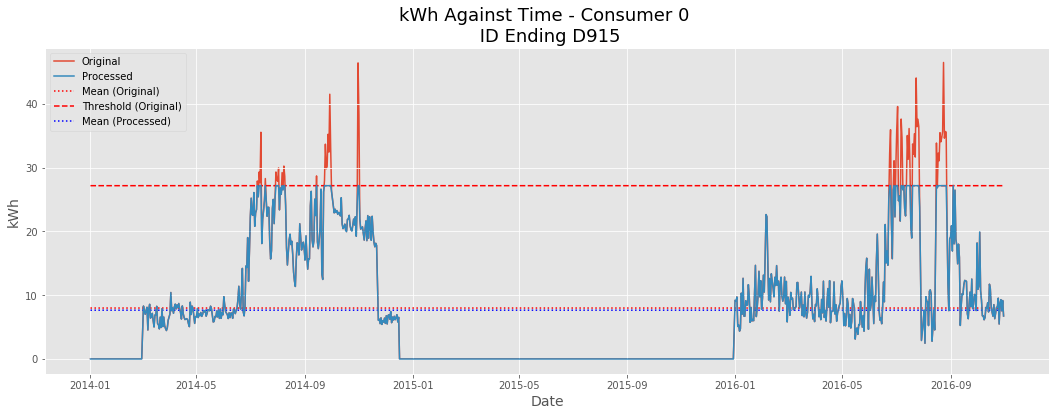

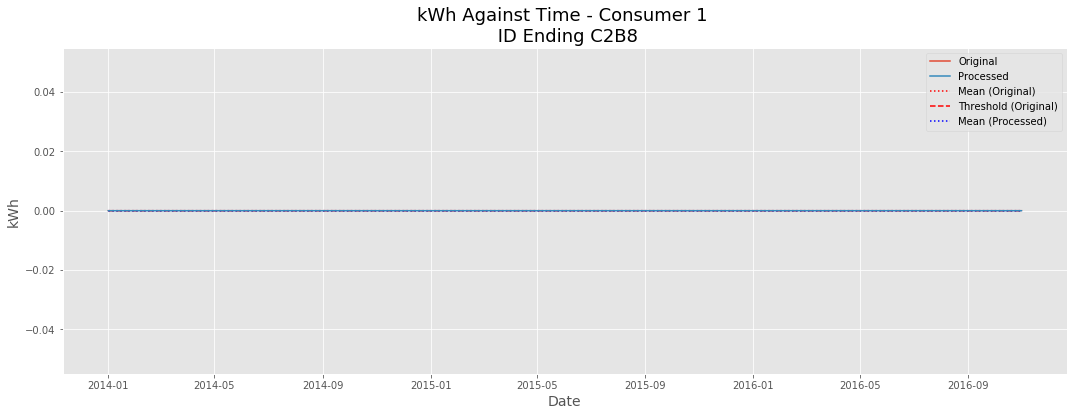

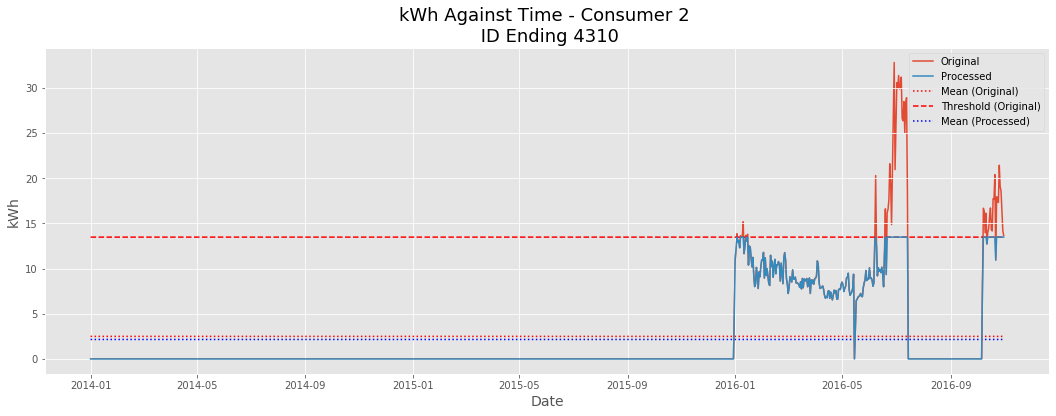

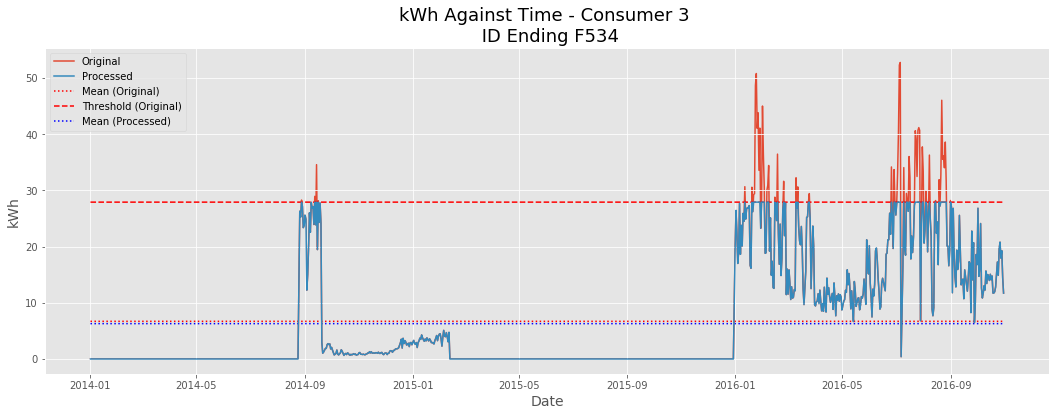

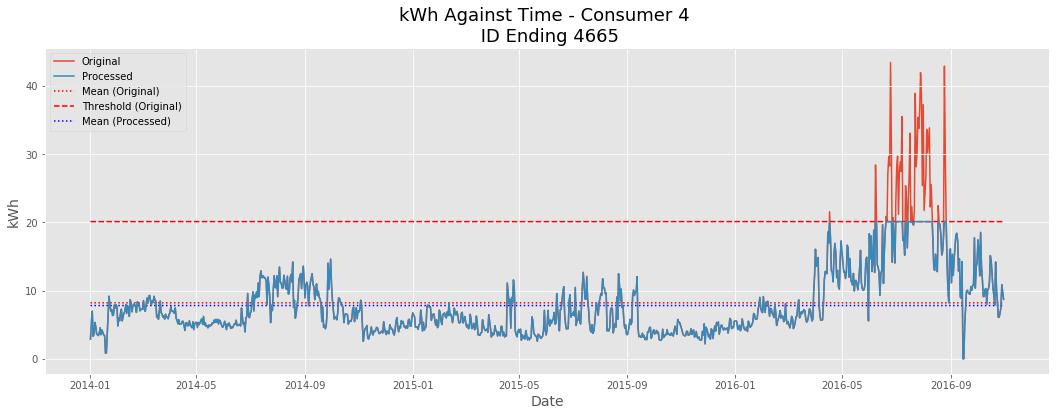

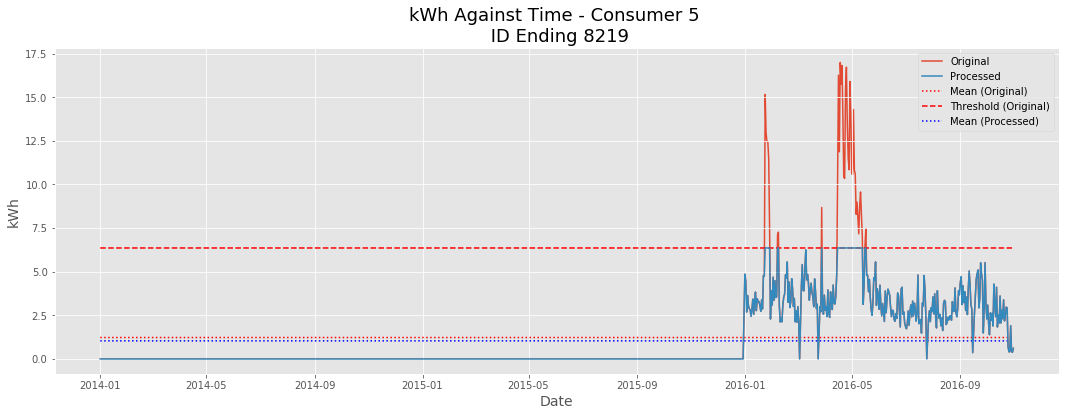

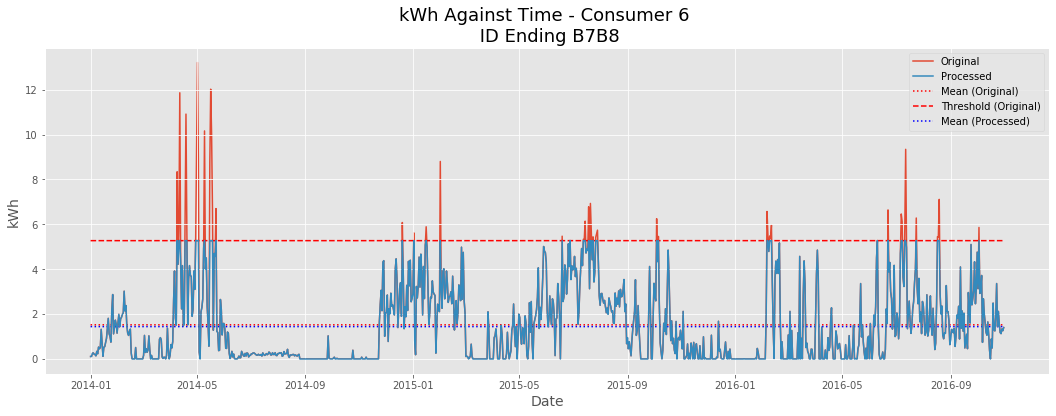

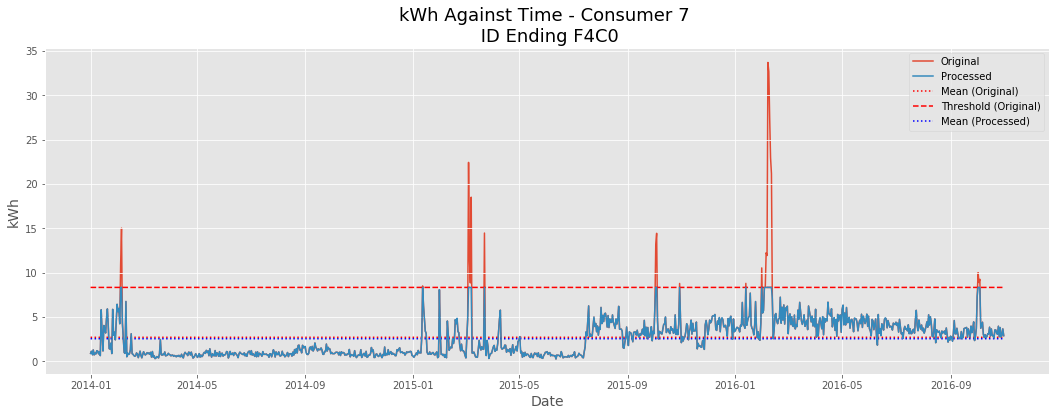

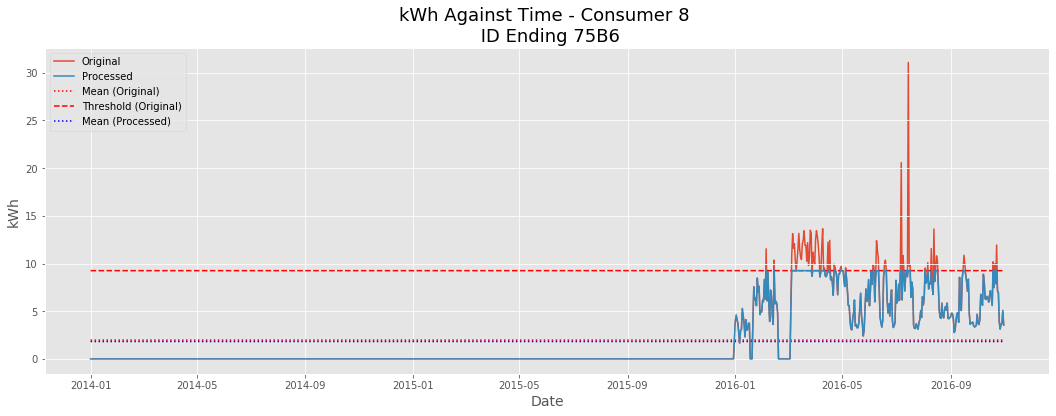

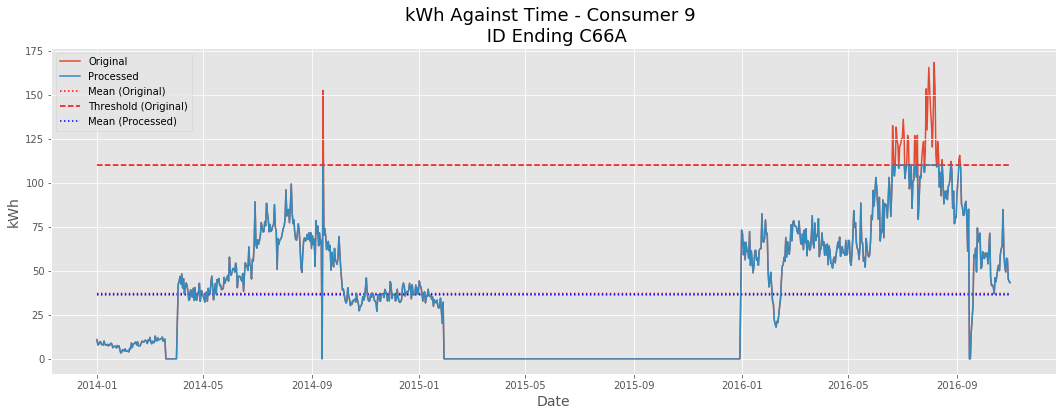

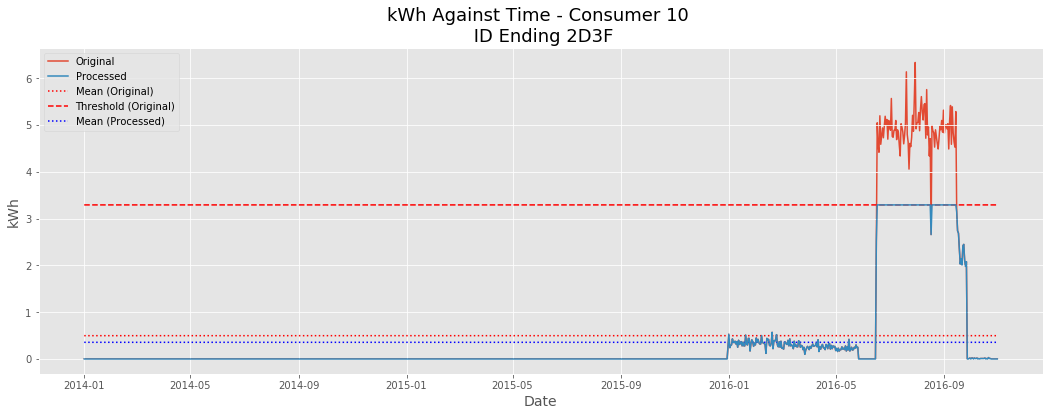

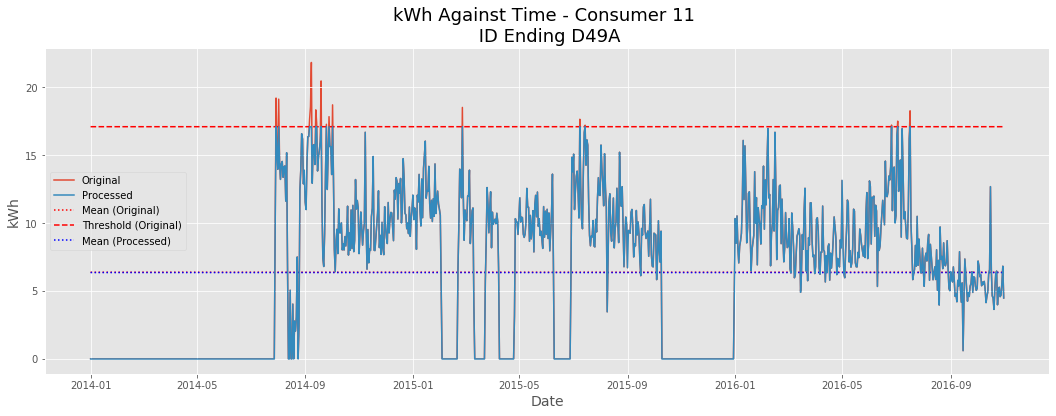

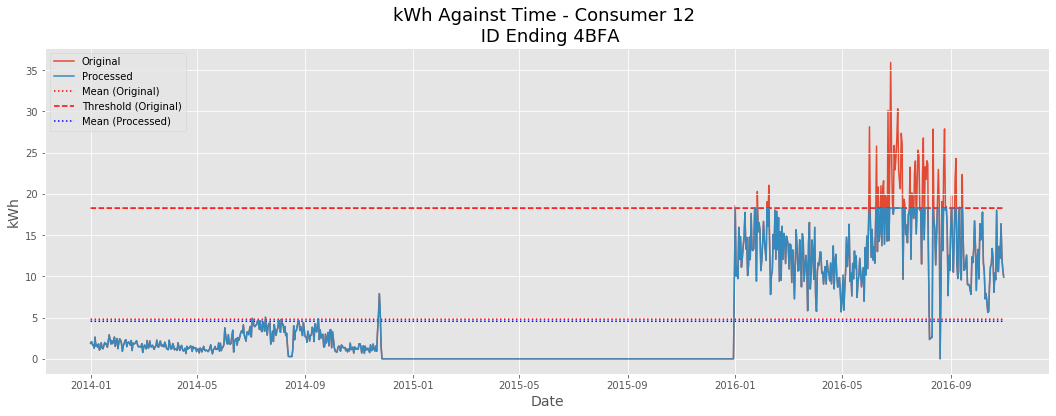

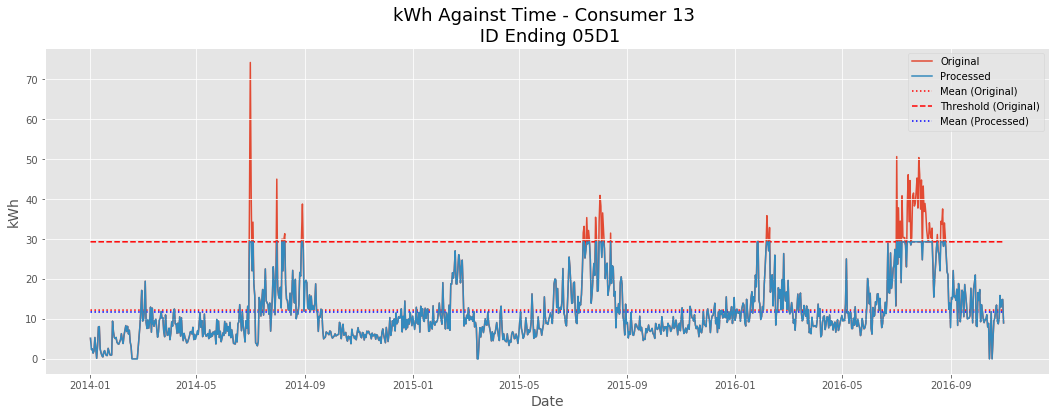

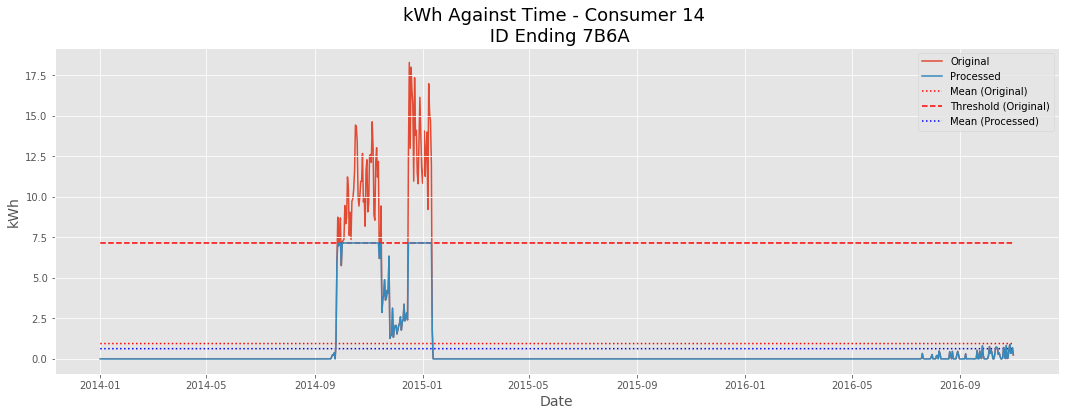

In [14]:
plot_consumer_kWhs(original_data=interpolated_data, processed_data=outliers_removed,
                  plot_mean_std=True, original_first=False, consumer_idx=np.arange(0, 15))

### Interpretation
- The visualizations confirm that this implementation of outlier identification and capping is correct.
- The processed data never exceeds the threshold of the original data. 
- As expected, the outlier capping results in a very small decrease in mean kWh value.
- Furthermore, the small proportion of red vs blue kWhs in the dataset indicates that this outlier scheme does not modify the vast majority of the kWh consumption data, so trends will not be lost.

## Feature Scaling 

Zheng et. al have used min-max scaling to normalize the feature values for an individual consumer. Concretely,
$$f(x_i) = \frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$$
where 
- $x_i$ is the kWh consumption of a single consumer on the $i^{th}$ day,
- $\textbf{x}$ is a vector $x_i$ day-by-day
- $min(\textbf{x})$ and $max(\textbf{x})$ are the minimum and maximum values of $x_i$ in $\textbf{x}$ for that consumer.

### Implementing with `sklearn`'s `MinMaxScaler`

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Make a separate copy to modify with the feature scaler
kWhs_unscaled = outliers_removed.iloc[:, 2:].copy()
kWhs_unscaled.head()

2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  2014-01-06  \
0         0.0        0.00        0.00        0.00        0.00        0.00   
1         0.0        0.00        0.00        0.00        0.00        0.00   
2         0.0        0.00        0.00        0.00        0.00        0.00   
3         0.0        0.00        0.00        0.00        0.00        0.00   
4         2.9        5.64        6.99        3.32        3.61        5.35   

   2014-01-07  2014-01-08  2014-01-09  2014-01-10  ...  2016-10-22  \
0        0.00        0.00        0.00        0.00  ...        7.18   
1        0.00        0.00        0.00        0.00  ...        0.00   
2        0.00        0.00        0.00        0.00  ...       10.95   
3        0.00        0.00        0.00        0.00  ...       12.81   
4        4.73        3.68        3.53        3.42  ...       14.21   

   2016-10-23  2016-10-24  2016-10-25  2016-10-26  2016-10-27  2016-10-28  \
0    8.070000    8.090000    9.530000    5.480000    8.750000    9.300000   
1    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2   13.483126   13.483126   13.483126   13.483126   13.483126   13.483126   
3   15.120000   17.260000   14.910000   19.590000   20.790000   17.950000   
4   10.220000    8.470000    6.110000    6.100000    6.730000    7.520000   

   2016-10-29  2016-10-30  2016-10-31  
0    7.540000    9.160000    6.740000  
1    0.000000    0.000000    0.000000  
2   13.483126   13.483126   13.483126  
3   19.260000   14.460000   11.720000  
4   10.890000    9.860000    8.720000  

[5 rows x 1034 columns]

`MinMaxScaler` scales along the column axis i.e. it will find the minimum and maximum values in a single column and use them for feature scaling.

Since we want to scale according to min and max values amongt all kWhs of a single consumer (which is on the row axis) and not the min/max values amongst all consumers on a single day (which is the column axis), **we will have to transpose the data**.

In [22]:
# Instantiate a MinMaxScaler
minMaxScaler = MinMaxScaler()

In [18]:
# Confirming shape of matrix at each step
kWhs_unscaled.shape

(42372, 1034)

In [19]:
# After transposing
kWhs_unscaled.transpose().shape

(1034, 42372)

In [23]:
# Fit scaler to a transposed version of the dataset 
kWhs_scaled = minMaxScaler.fit_transform(kWhs_unscaled.transpose())

In [25]:
# Shape should now be 
kWhs_scaled.shape

(1034, 42372)

In [26]:
# Retranspose so that a single consumer's entries become a row again
kWhs_scaled = kWhs_scaled.transpose()

In [27]:
# Is the shape the same as the original kWhs
assert kWhs_scaled.shape == kWhs_unscaled.shape

In [28]:
# Make a new value of the original dataframe
scaled_df = outliers_removed.copy()

In [30]:
# Should have two more columns than the kWhs
scaled_df.shape

(42372, 1036)

In [32]:
assert scaled_df.iloc[:, 2:].shape == kWhs_scaled.shape

In [33]:
# Replaced unscaled kWhs in the dataframe with scaled kWhs
scaled_df.iloc[:, 2:] = kWhs_scaled

In [35]:
# Does it work?
scaled_df.describe()

FLAG    2014-01-01    2014-01-02    2014-01-03    2014-01-04  \
count  42372.000000  42372.000000  42372.000000  42372.000000  42372.000000   
mean       0.085316      0.204440      0.199679      0.190530      0.198449   
std        0.279354      0.295968      0.284199      0.276891      0.282377   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.402098      0.391761      0.374889      0.390170   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         2014-01-05    2014-01-06    2014-01-07    2014-01-08    2014-01-09  \
count  42372.000000  42372.000000  42372.000000  42372.000000  42372.000000   
mean       0.206947      0.196184      0.191316      0.191541      0.195721   
std        0.291945      0.279222      0.276287      0.274112      0.283740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.404704      0.385851      0.371660      0.374661      0.386129   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...    2016-10-22    2016-10-23    2016-10-24    2016-10-25  \
count  ...  42372.000000  42372.000000  42372.000000  42372.000000   
mean   ...      0.410899      0.420259      0.375083      0.385599   
std    ...      0.305900      0.310929      0.283727      0.291264   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.111011      0.114406      0.103779      0.101238   
50%    ...      0.424088      0.436010      0.382817      0.394942   
75%    ...      0.629986      0.647565      0.569159      0.585700   
max    ...      1.000000      1.000000      1.000000      1.000000   

         2016-10-26    2016-10-27    2016-10-28    2016-10-29    2016-10-30  \
count  42372.000000  42372.000000  42372.000000  42372.000000  42372.000000   
mean       0.398266      0.410437      0.416894      0.387329      0.374279   
std        0.298499      0.307138      0.309465      0.290806      0.286164   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.105831      0.104532      0.113716      0.108908      0.099402   
50%        0.409970      0.424664      0.429709      0.395986      0.378767   
75%        0.607124      0.629316      0.639562      0.587797      0.568204   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         2016-10-31  
count  42372.000000  
mean       0.363466  
std        0.280369  
min        0.000000  
25%        0.095211  
50%        0.365218  
75%        0.548442  
max        1.000000  

[8 rows x 1035 columns]

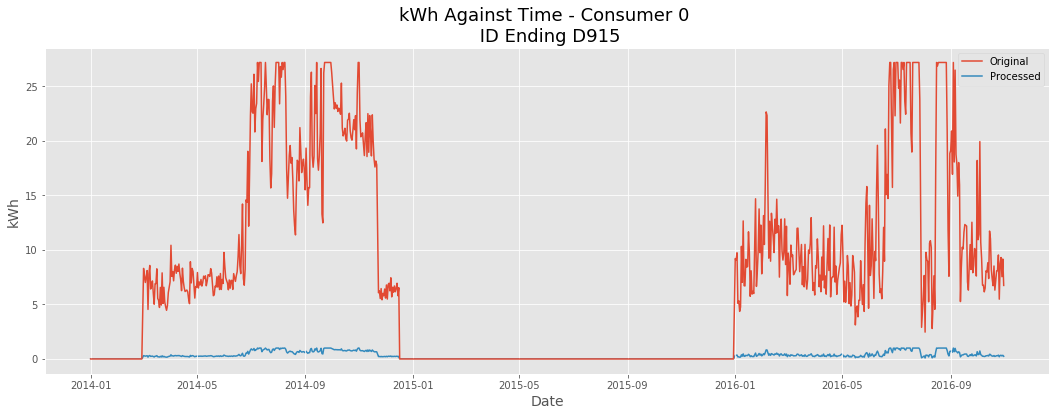

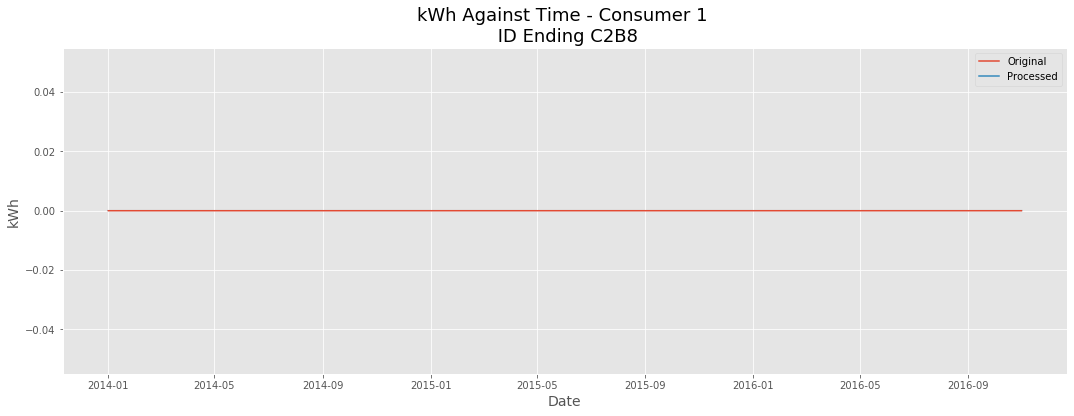

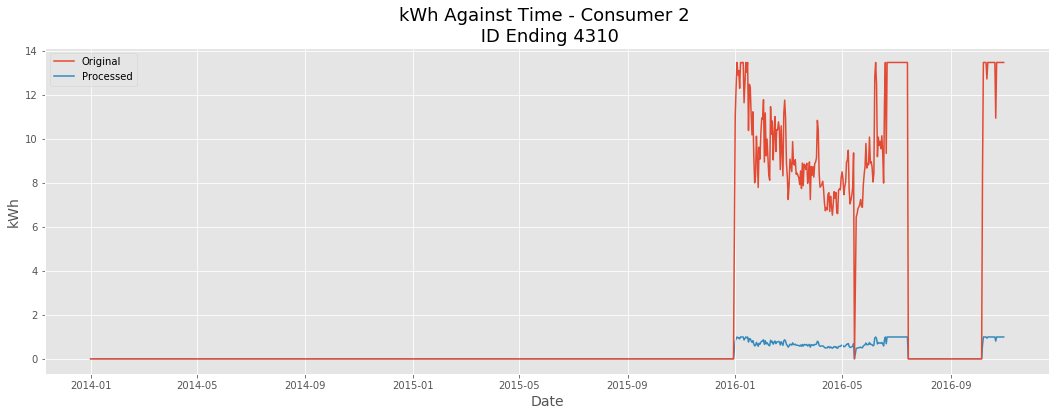

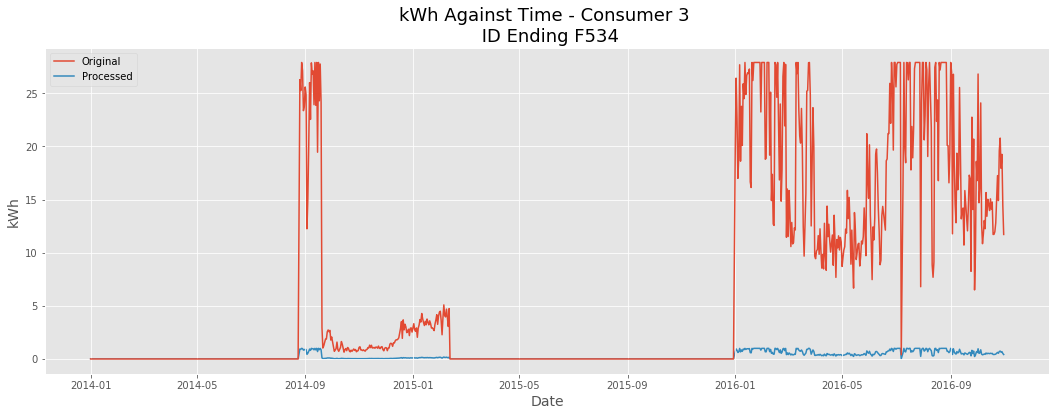

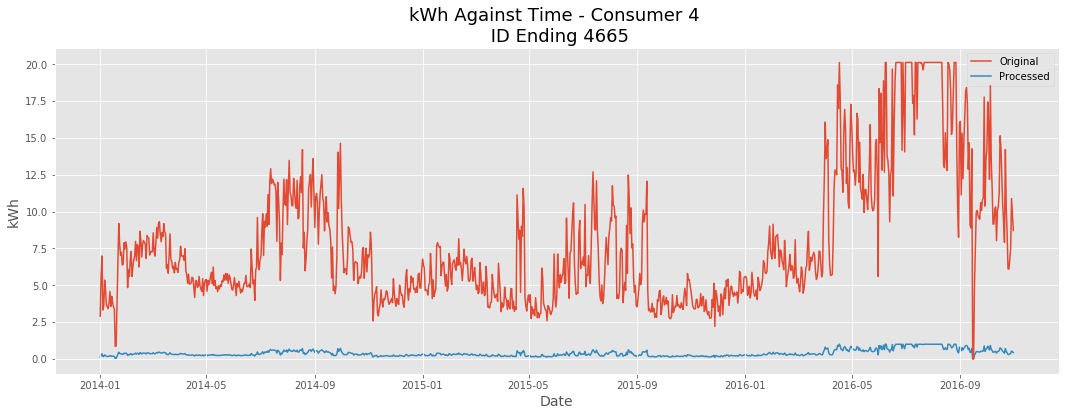

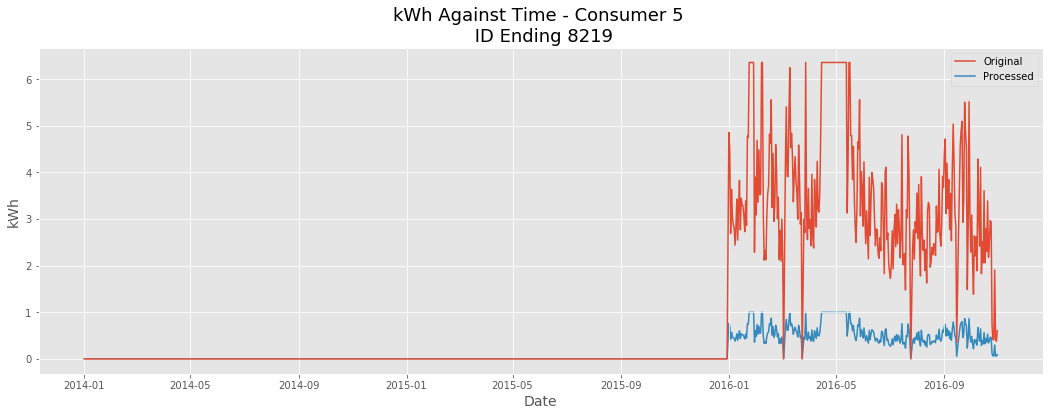

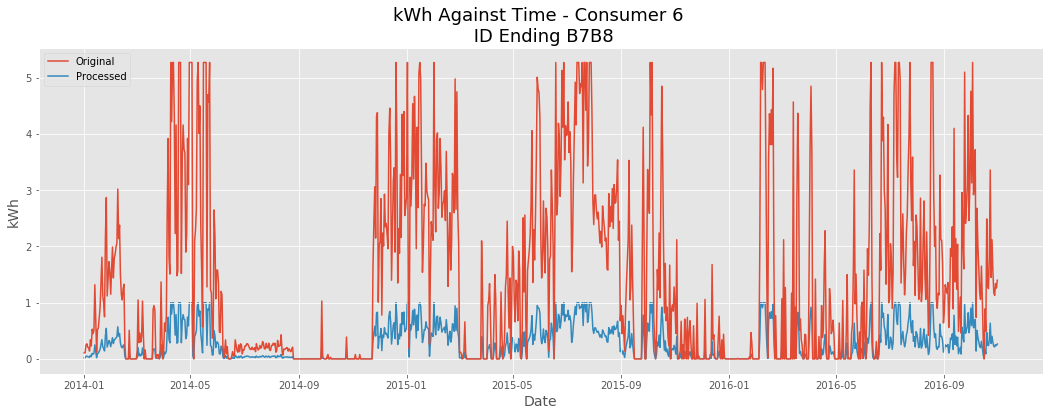

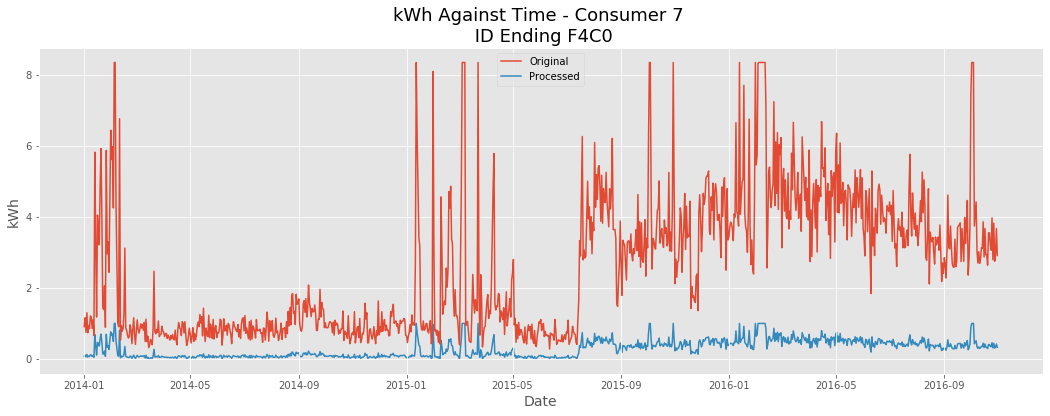

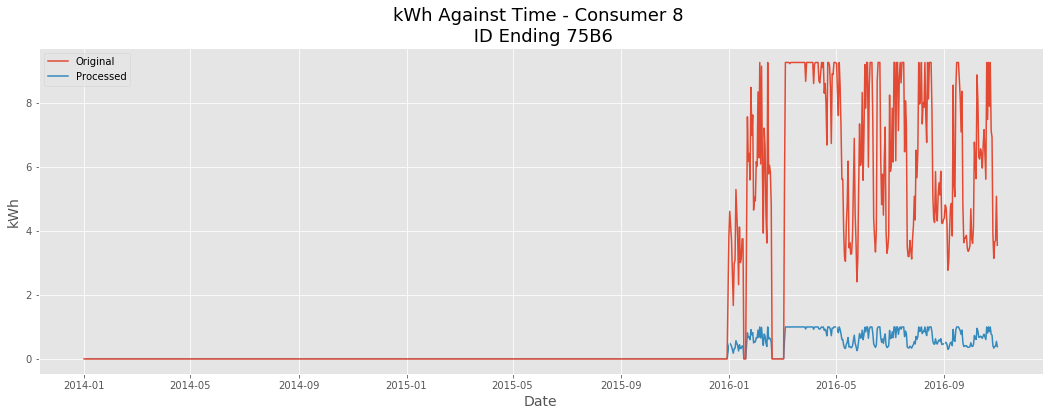

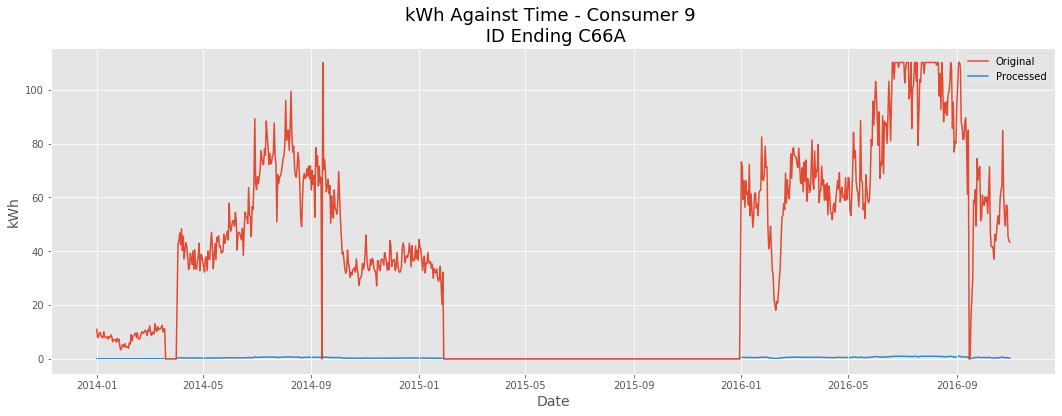

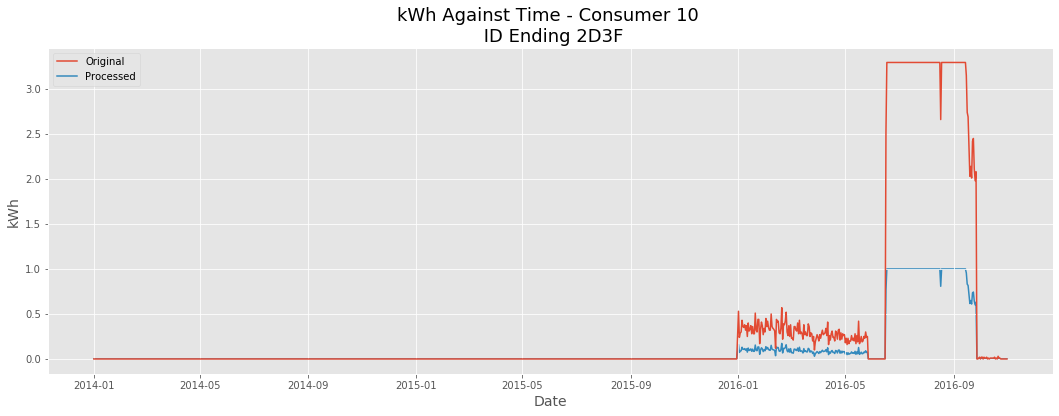

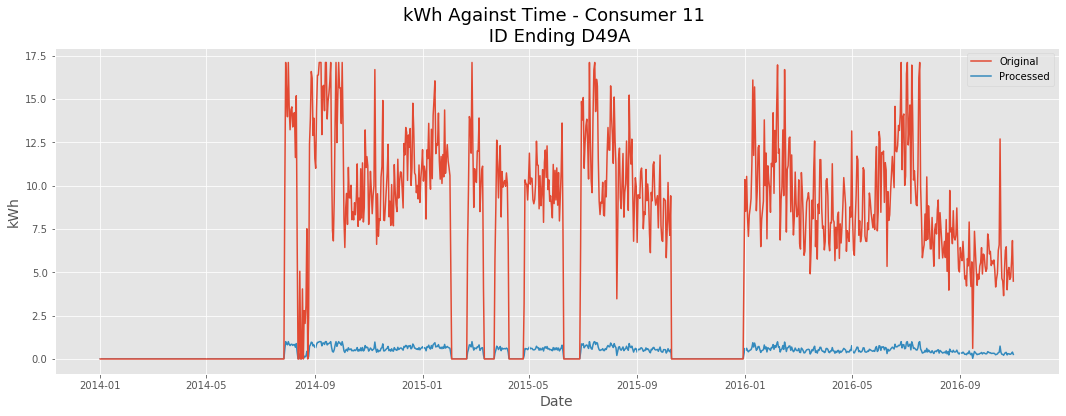

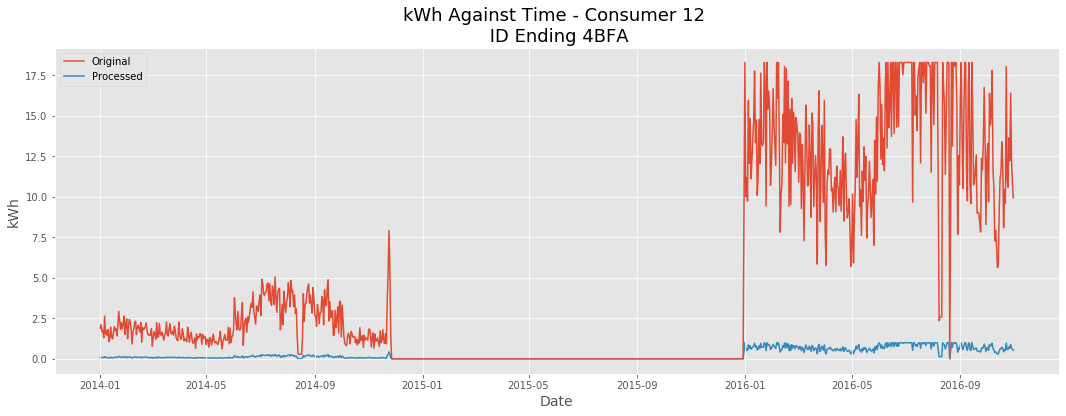

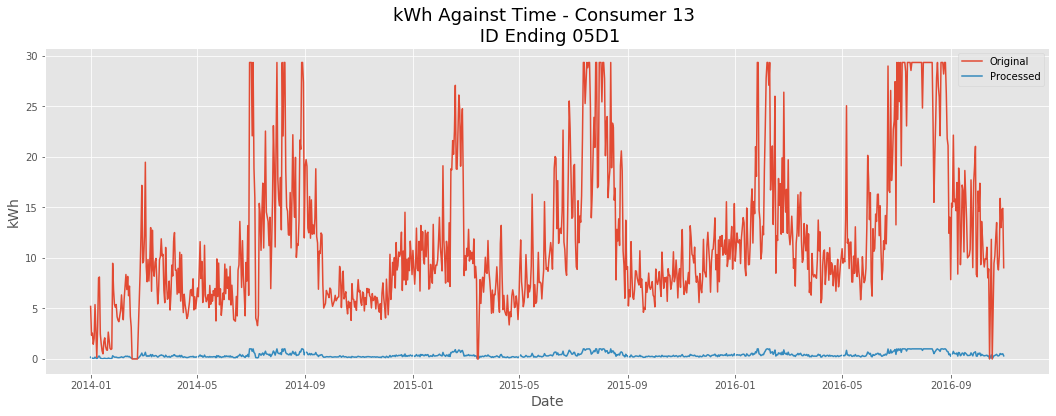

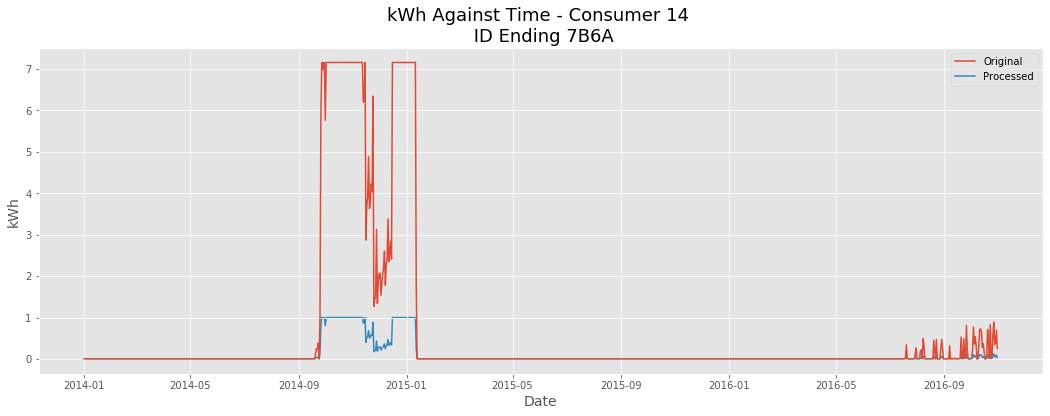

In [36]:
# Visualizing the result of scaling 
plot_consumer_kWhs(consumer_idx=np.arange(0, 15, 1), original_data=outliers_removed, 
                  processed_data=scaled_df)

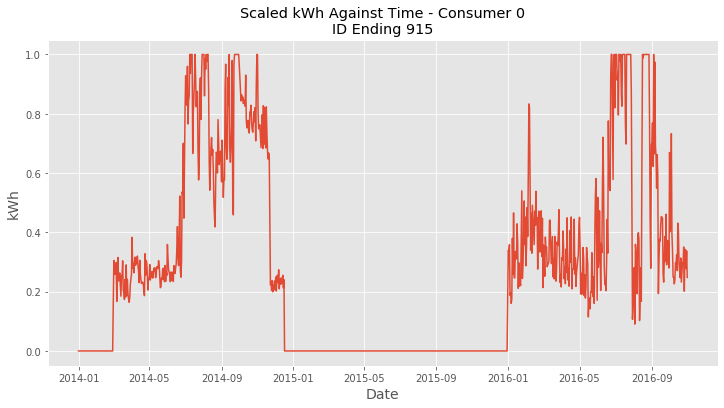

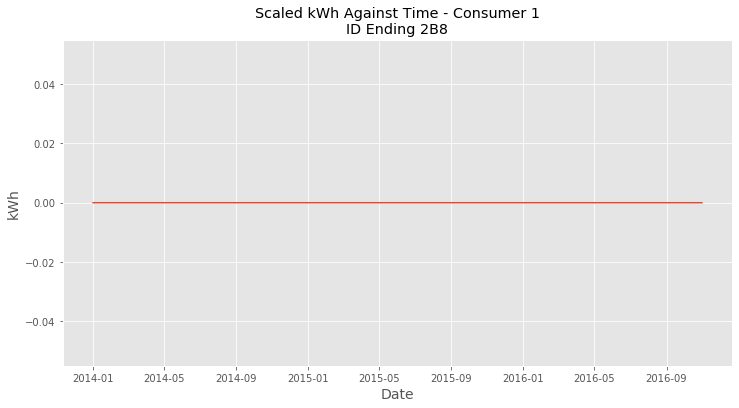

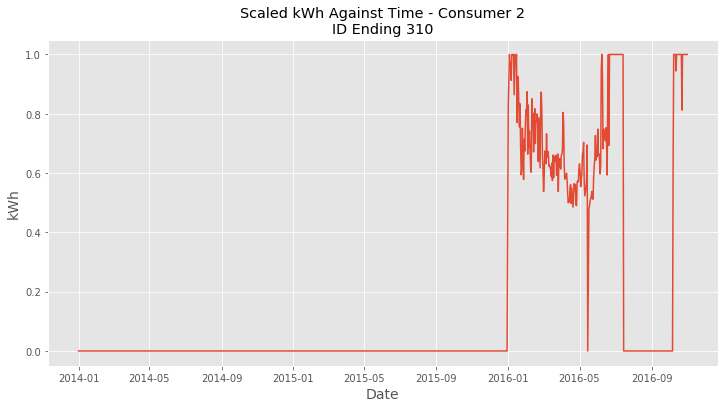

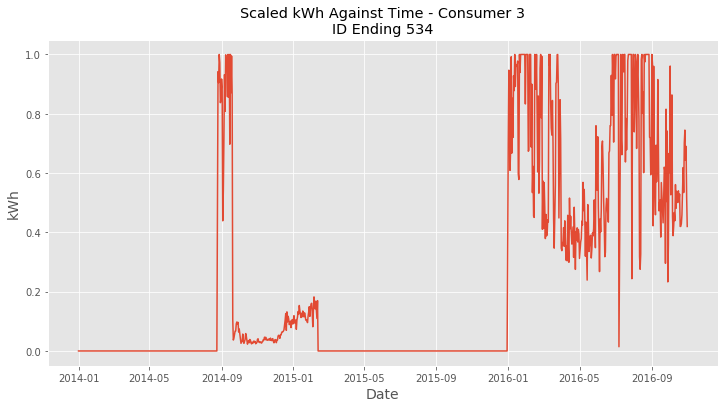

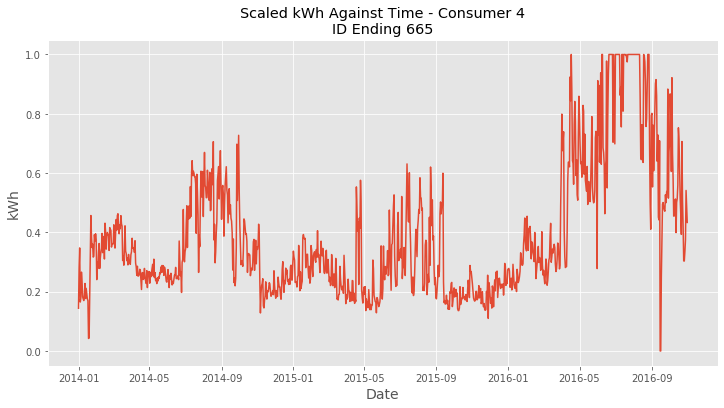

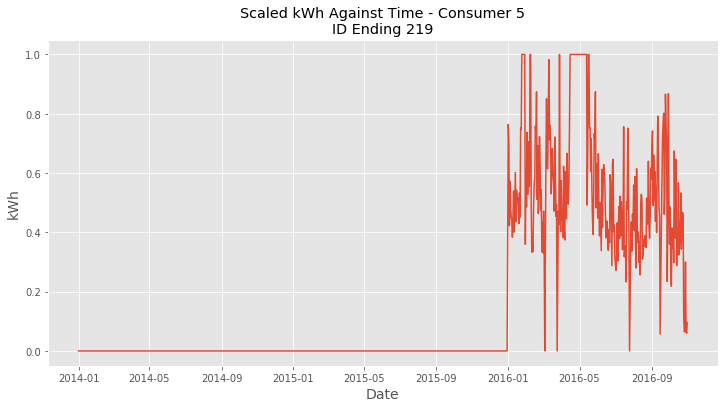

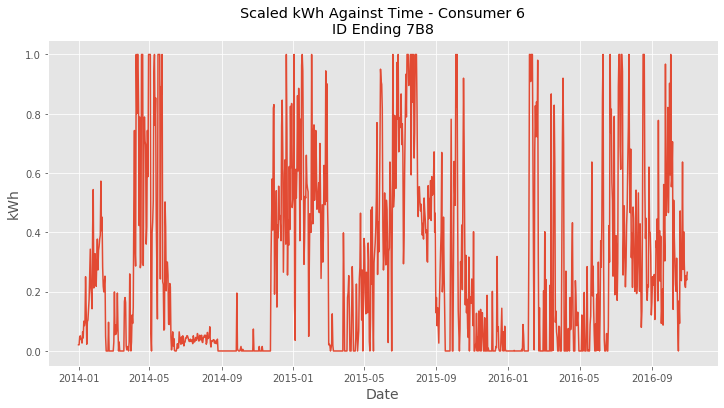

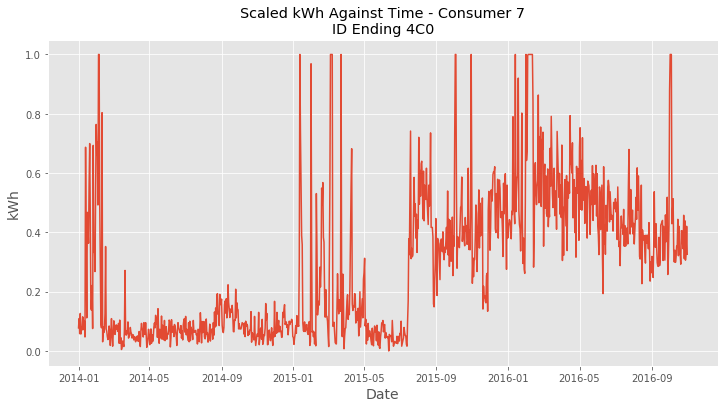

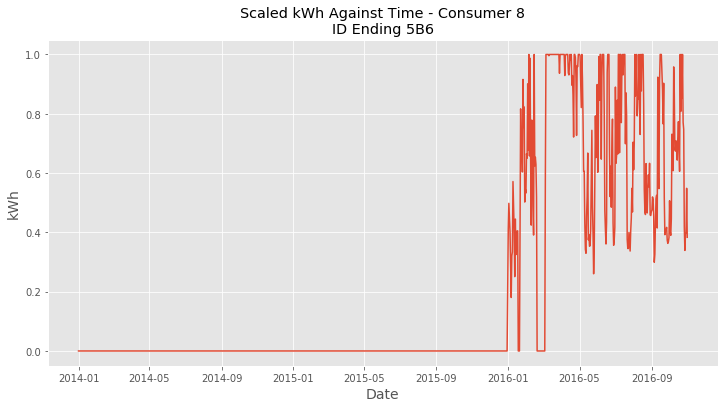

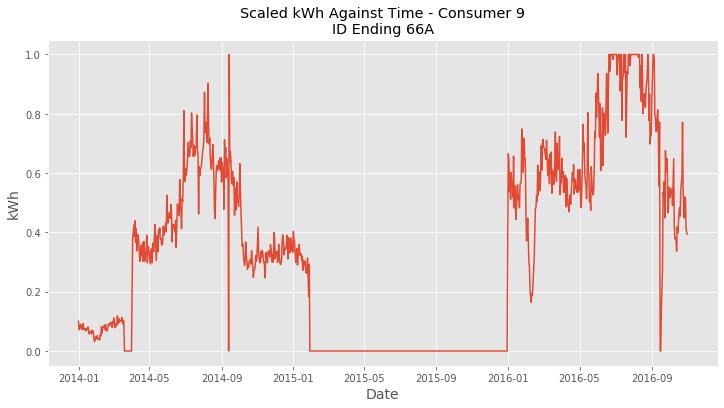

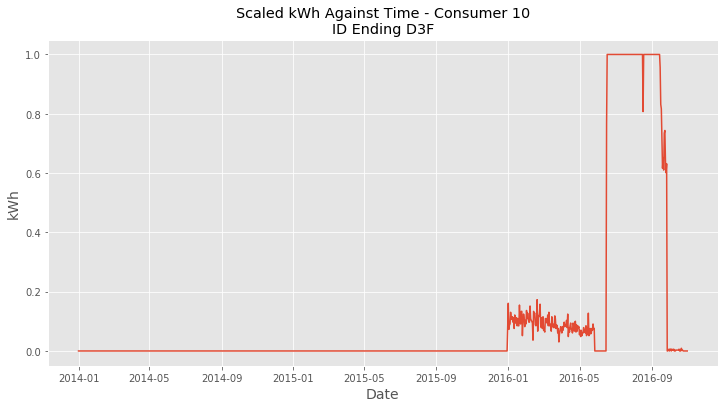

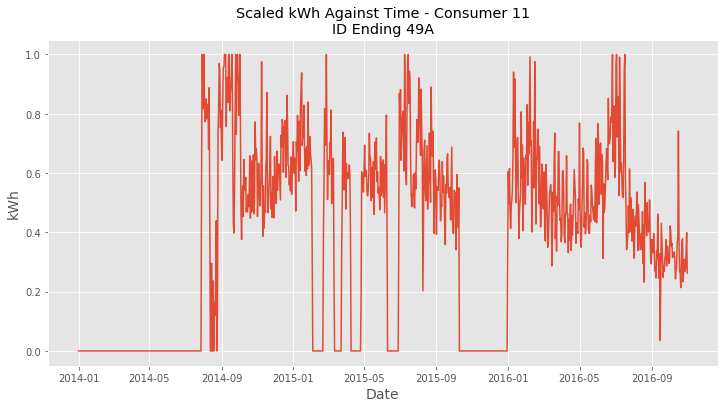

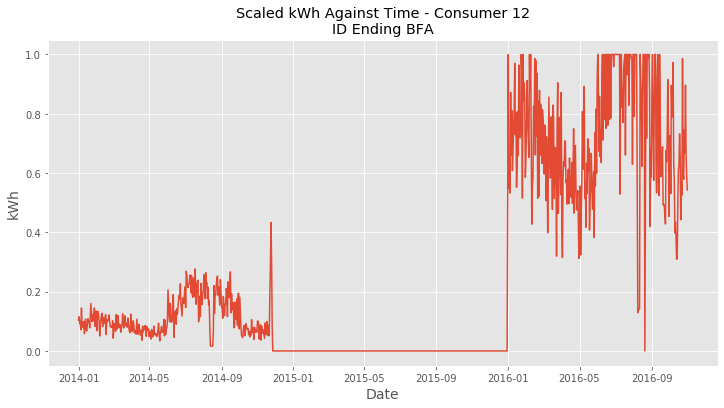

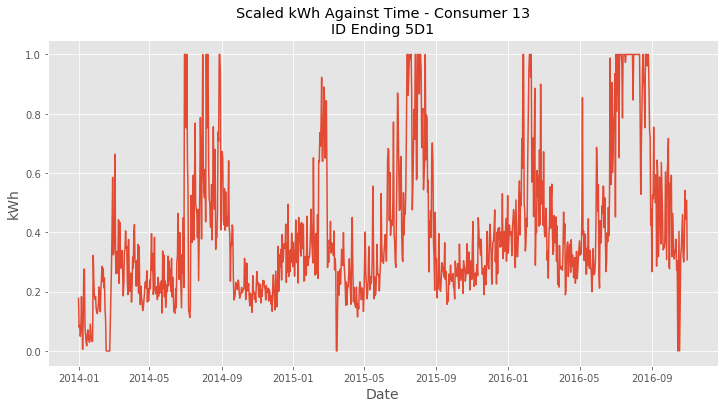

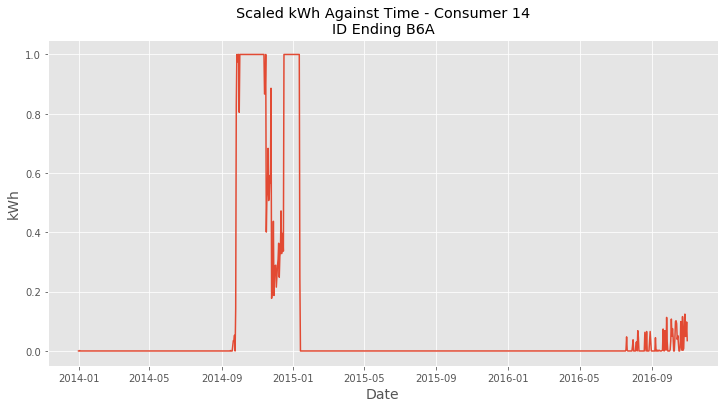

In [37]:
# Plotting the scaled kWh data separately
for i in range(0, 15):
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Extract dates for plotting on x axis
    dates = pd.DatetimeIndex(scaled_df.columns[2:])
    
    # Plot the scaled data for the `i`th consumer
    plt.plot(dates, scaled_df.iloc[i, 2:])
    
    # Annotate 
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('kWh', fontsize=14)
    
    # Title will have consumer number and last four chars of ID
    plt.title('Scaled kWh Against Time - Consumer {}\nID Ending {}'.format(i, scaled_df.iloc[i, 0][-4:-1]))

In [38]:
def compare_scaled_kWhs(original_data, scaled_data, consumer_idx=[0], figsize=(12, 6)):
    """Function to provide a side-by-side comparison of scaled and unscaled kWh values of a consumer"""
    # Extract dates
    dates = pd.DatetimeIndex(original_data.columns[2:])
    
    for i in consumer_idx:
        # Create a subplot with 1 row, 2 cols and get references to each
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        # Set the size of the overall figure
        fig_width, fig_height = figsize
        fig.set_figwidth(fig_width)
        fig.set_figheight(fig_height)
        
        # Set title of the figure 
        fig.suptitle('Consumer No. {} - ID Ending in {}'.format(i, original_data.iloc[i, 0][-5:-1]), 
                    fontsize=18)
        
        # Plot the original data on the left subplot
        ax1.plot(dates, original_data.iloc[i, 2:])
        ax1.set_xlabel('Dates', fontsize=14)
        ax1.set_ylabel('Raw kWh', fontsize=14)
        ax1.set_title('Before Scaling', fontsize=16)
        
        # Plot the scaled data on the right subplot
        ax2.plot(dates, scaled_data.iloc[i, 2:], 'b')
        ax2.set_xlabel('Dates', fontsize=14)
        ax2.set_ylabel('Scaled kWh', fontsize=14)
        ax2.set_title('After Scaling', fontsize=16)

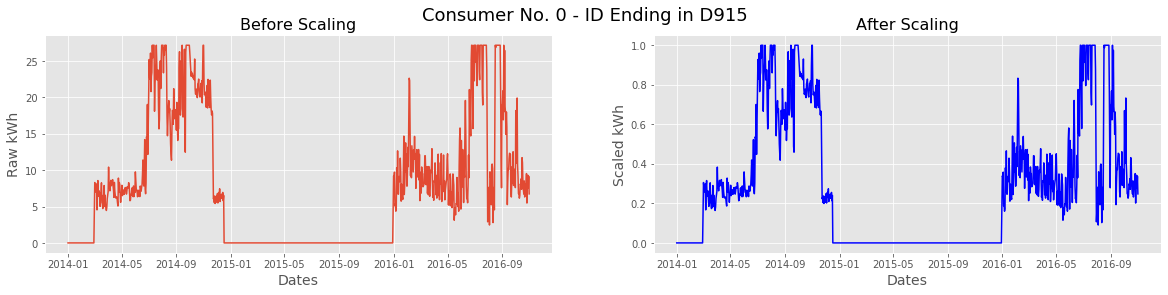

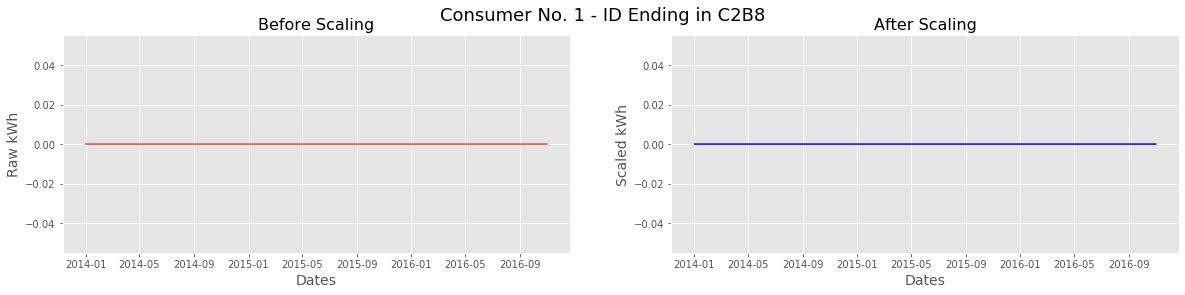

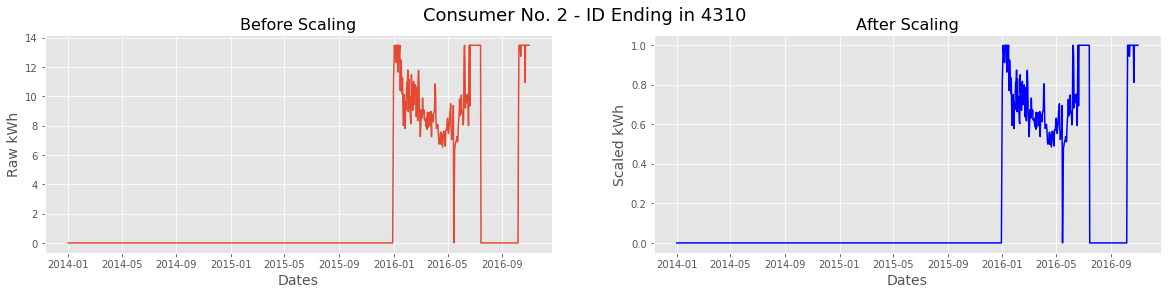

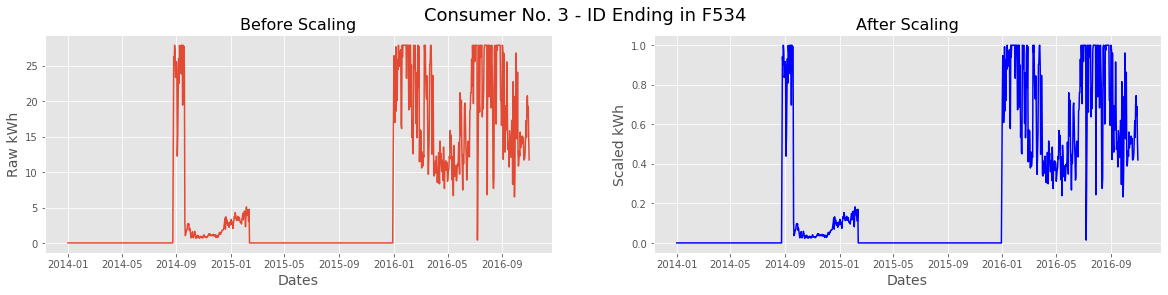

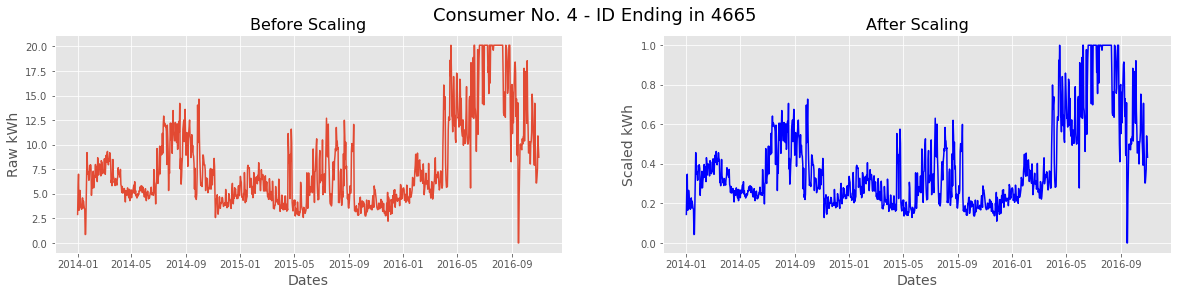

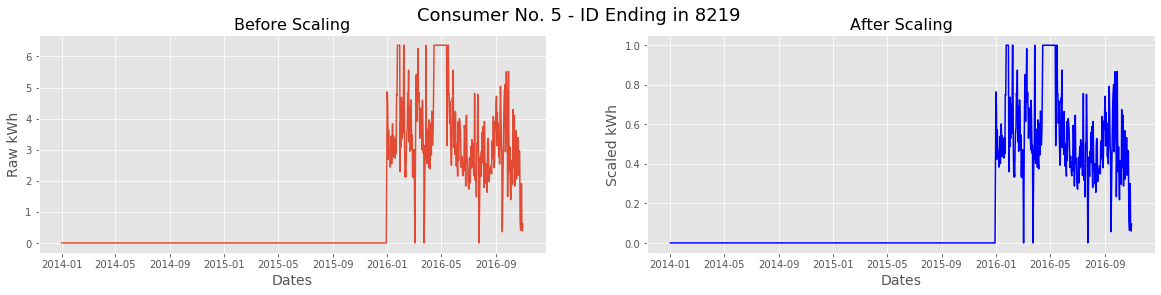

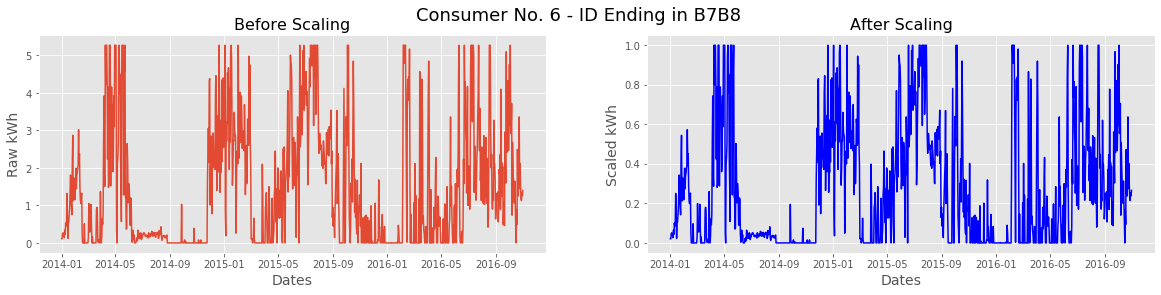

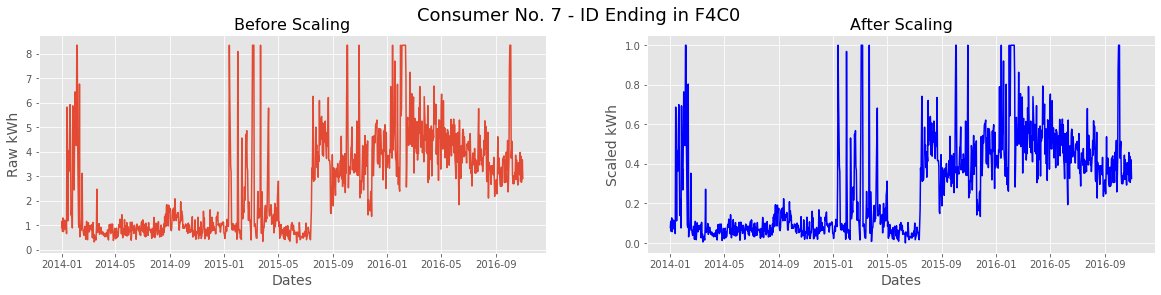

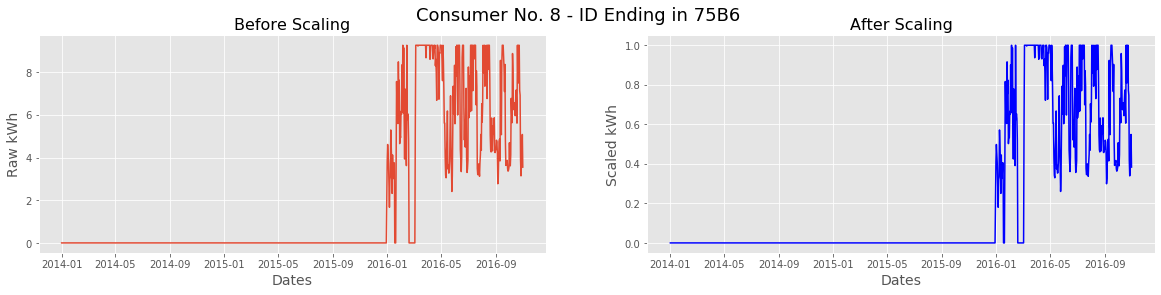

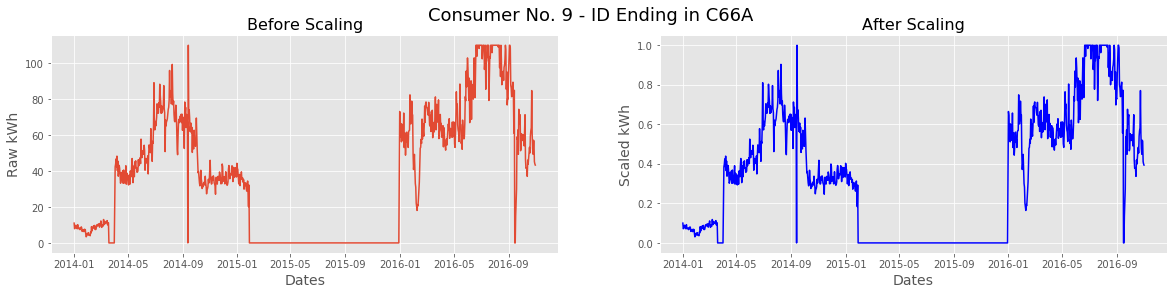

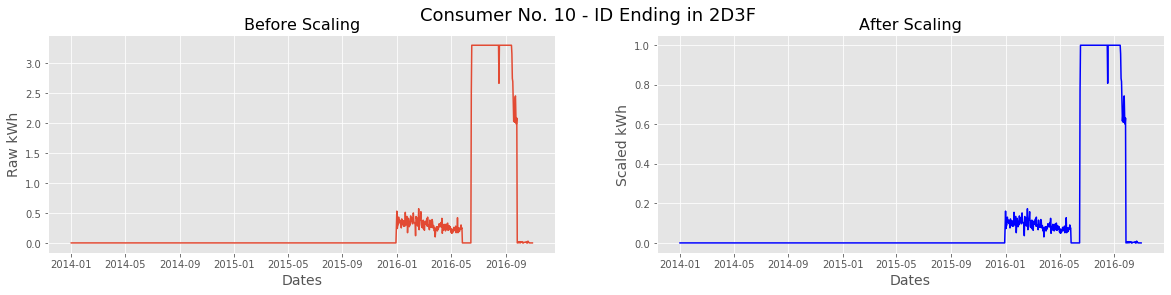

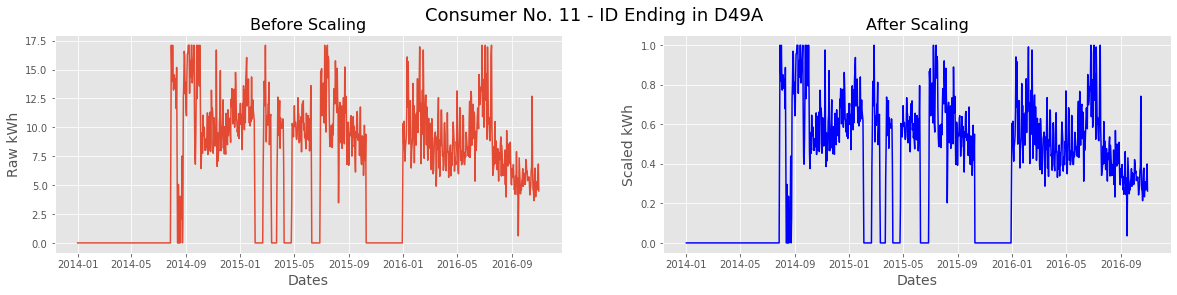

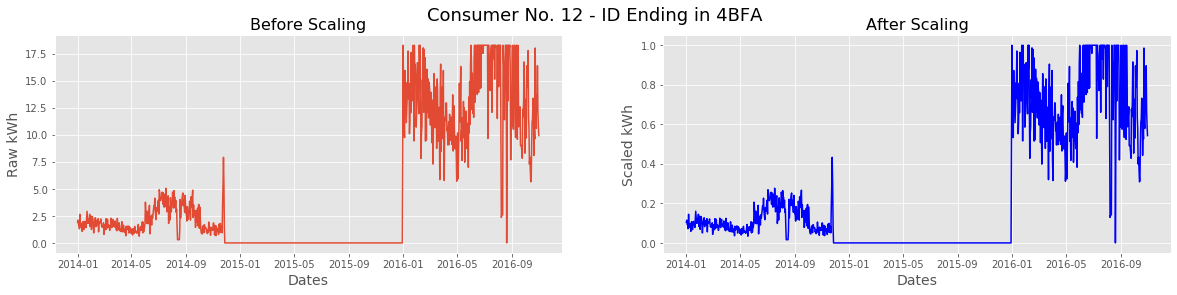

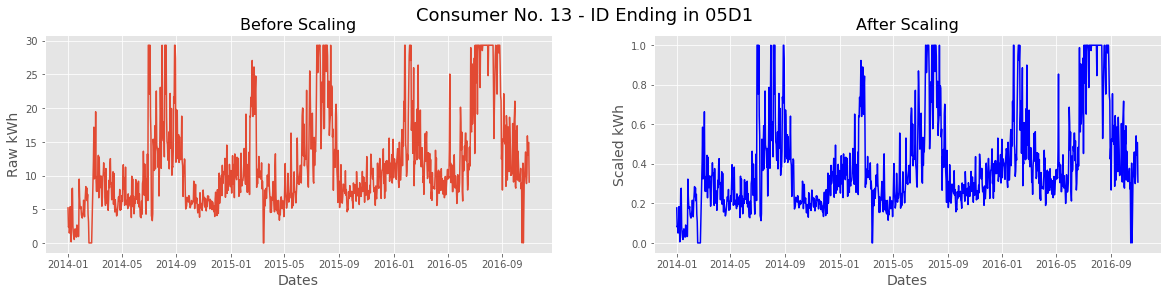

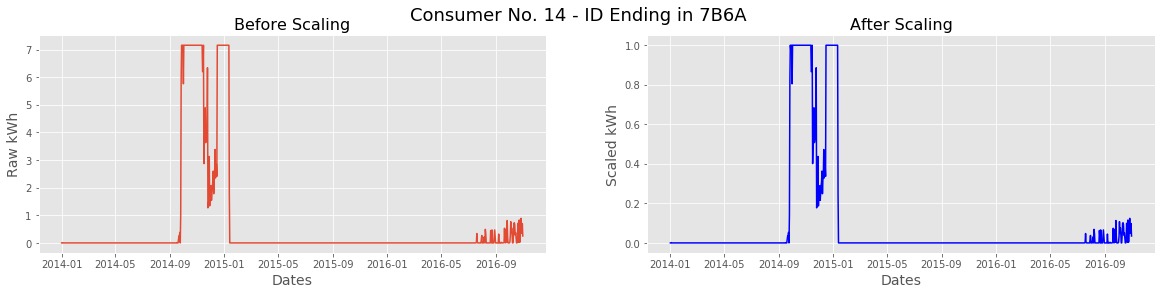

In [39]:
compare_scaled_kWhs(original_data=outliers_removed, scaled_data=scaled_df, 
                    consumer_idx=np.arange(0, 15), figsize=(20, 4))

### Interpretation
- Graphs show that the use of a `MinMaxScaler` along with transposition of the original dataset gives the right results.
- The kWh consumption patterns remain the same for each consumer before and after processing.
- The only difference is in the scale of the consumption values.
- The `MinMaxScaler` has brought all values between 0 and 1, as expected.

In [46]:
# Write to CSV 
scaled_df.to_csv('./final-scaled-data.csv', index=False)

In [42]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016-10-31
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB
